# Ramesh Gopinath's Wilson Hackathon

## Importing Necessary Libraries

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1. Data Loading and Cleansing

In [3]:
Train_set_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Wilson Hackathon/training_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
Test_set_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Wilson Hackathon/testing_data.csv")

In [ ]:
Train_set_df

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,104995,31-Dec-98,New,0,0,1999,Rs.5136896.0,PURPOSE PUBLISHING,Yes,Undefined,...,541430,Rs.6421120.0,Rs.6421120.0,180,29-Oct-98,2421704001,1,Capital Small Finance Bank Ltd,0,0
104996,104996,30-Nov-03,New,0,0,2004,Rs.6908800.0,NANA BEAR'S QUILTS,Yes,Rural,...,451130,Rs.8128000.0,Rs.8128000.0,135,2-Oct-03,6752024001,1,Airtel Payments Bank Ltd,0,0
104997,104997,31-Mar-06,New,6,0,2006,Rs.812800.0,Pho 777,No,Urban,...,722110,Rs.1625600.0,Rs.1625600.0,34,28-Feb-06,1685875001,0,Karur Vysya Bank Ltd.,No,1
104998,104998,16-May-07,Existing,0,3,2007,Rs.10810240.0,FLEX TEMP CORPORATION dba LABO,No,Urban,...,561310,Rs.10810240.0,Rs.9916160.0,360,9-Jan-07,2617916010,1,Central Bank of India,0,0


In [242]:
Train_set_df.dtypes

ID                            int64
Date_Of_Disbursement         object
Business                     object
Jobs_Reatained                int64
Jobs_Created                  int64
Year_Of_Commitment           object
Guaranteed_Approved _Loan    object
Borrower_Name                object
Low_Documentation_Loan       object
Demography                   object
State_Of_Bank                object
ChargedOff_Amount            object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance         object
Count_Employees               int64
Classification_Code           int64
Loan_Approved_Gross          object
Gross_Amount_Disbursed       object
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line        object
Default                       int64
dtype: object

In [ ]:
Test_set_df.dtypes

ID                            int64
Date_Of_Disbursement         object
Business                     object
Jobs_Reatained                int64
Jobs_Created                  int64
Year_Of_Commitment           object
Guaranteed_Approved _Loan    object
Borrower_Name                object
Low_Documentation_Loan       object
Demography                   object
State_Of_Bank                object
ChargedOff_Amount            object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance         object
Count_Employees               int64
Classification_Code           int64
Loan_Approved_Gross          object
Gross_Amount_Disbursed       object
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line        object
dtype: object

In [ ]:
Test_set_df

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,105000,31-Mar-06,Existing,19,0,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,...,17,326199,Rs.8128000.0,Rs.9403852.16,57,9-Mar-06,1702825000,0,ICICI Bank Ltd.,Yes
1,105001,31-Jan-95,Existing,0,0,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,...,2,0,Rs.1625600.0,Rs.1625600.0,90,14-Dec-94,7908833003,1,South Indian Bank Ltd.,No
2,105002,30-Sep-06,Existing,7,5,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,...,2,541611,Rs.1625600.0,Rs.3450336.0,81,25-Aug-06,2361626001,1,IDBI Bank Limited,Yes
3,105003,31-Jul-00,New,2,0,2000,Rs.2032000.0,FIRST IN RESCUE EQUIPMENT,No,Urban,...,2,0,Rs.4064000.0,Rs.6916196.48,18,28-Jun-00,3814664008,1,Aryavart Bank,Yes
4,105004,30-Jun-05,Existing,0,0,2005,Rs.23469600.0,"GLASGOW AUTOMOTIVE, INC.",No,Rural,...,6,441310,Rs.31292800.0,Rs.31292800.0,219,2-May-05,8830244003,1,Paschim Banga Gramin Bank,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,149995,30-Nov-05,Existing,3,1,2005,Rs.1625600.0,ULTIMATE COMPUTERS,No,Urban,...,3,423690,Rs.3251200.0,Rs.2291852.16,81,29-Sep-05,9135674006,1,Saurashtra Gramin Bank,Yes
44996,149996,31-Jul-02,Existing,12,0,2002,Rs.29657040.0,"MARK A. HENKE, D>M.D., P.C.",No,Urban,...,12,621210,Rs.39542720.0,Rs.36292170.24,180,27-Jun-02,5494234007,1,Uttarbanga Kshetriya Gramin Bank,NaN
44997,149997,13-Aug-08,Existing,0,15,2008,Rs.60878720.0,"ARTHUR J DEBAISE M.D., P.A.",No,Urban,...,4,621111,Rs.60878720.0,Rs.60878720.0,360,15-Apr-08,3225006003,1,Aryavart Bank,NaN
44998,149998,28-Feb-03,Existing,2,0,2003,Rs.2032000.0,CHO & SONS CORP,No,Urban,...,2,445120,Rs.4064000.0,Rs.4064000.0,90,24-Jan-03,6047584010,1,Au Small Finance Bank Ltd.,NaN


In [ ]:
print("Train set shape",Train_set_df.shape)
print("Test set shape", Test_set_df.shape)

Train set shape (105000, 26)
Test set shape (45000, 25)


Test and Train dataset have the same set of columns with Train set having one column extra................ **Default**

In [5]:
Original_Train_set = Train_set_df.copy()
Original_Test_set = Test_set_df.copy()

There are some spaces in the column names which needs to be cleaned up

In [ ]:
Train_set_df["Jobs_Created"] = Train_set_df["Jobs_Created "]
Train_set_df["Year_Of_Commitment"] = Train_set_df["Year_Of_Commitment "]
Train_set_df["Borrower_Name"] = Train_set_df["Borrower_Name "]
Train_set_df["ChargedOff_Amount"] = Train_set_df["ChargedOff_Amount "]
Train_set_df["Classification_Code"] = Train_set_df["Classification_Code "]
Train_set_df["Gross_Amount_Disbursed"] = Train_set_df["Gross_Amount_Disbursed  "]
Train_set_df["Guaranteed_Approved_Loan"] = Train_set_df["Guaranteed_Approved _Loan"]

In [ ]:
print("Train set shape",Train_set_df.shape)
print("Test set shape", Test_set_df.shape)

Train set shape (105000, 33)
Test set shape (45000, 25)


This has created 7 new columns so we have to drop the previous columns

In [ ]:
Train_set_df.drop(['Jobs_Created ', 'Year_Of_Commitment ', 'Borrower_Name ', 'ChargedOff_Amount ', 'Classification_Code ', 'Gross_Amount_Disbursed  ','Guaranteed_Approved _Loan'], axis=1, inplace = True)

In [ ]:
print("Train set shape",Train_set_df.shape)
print("Test set shape", Test_set_df.shape)

Train set shape (105000, 26)
Test set shape (45000, 25)


In [ ]:
Train_set_df.dtypes

ID                           int64
Date_Of_Disbursement        object
Business                    object
Jobs_Reatained               int64
Low_Documentation_Loan      object
Demography                  object
State_Of_Bank               object
Borrower_City               object
Borrower_State              object
Gross_Amount_Balance        object
Count_Employees              int64
Loan_Approved_Gross         object
Loan_Term                    int64
Commitment_Date             object
Primary_Loan_Digit           int64
Code_Franchise               int64
Name_Of_Bank                object
Revolving_Credit_Line       object
Default                      int64
Jobs_Created                 int64
Year_Of_Commitment          object
Borrower_Name               object
ChargedOff_Amount           object
Classification_Code          int64
Gross_Amount_Disbursed      object
Guaranteed_Approved_Loan    object
dtype: object

Removing the extra time component provided in Date_of_disbursement column

In [ ]:
Train_set_df[Train_set_df["Date_Of_Disbursement"] == '10/31/2007 0:00']

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,...,Name_Of_Bank,Revolving_Credit_Line,Default,Jobs_Created,Year_Of_Commitment,Borrower_Name,ChargedOff_Amount,Classification_Code,Gross_Amount_Disbursed,Guaranteed_Approved_Loan
6,6,10/31/2007 0:00,New,3,No,Urban,AS,Kolkata,West Bengal,Rs.0.0,...,Dhanlaxmi Bank Ltd.,Yes,1,3,2007,"Diffusion Limited, LLC",Rs.2022896.6400000001,541618,Rs.7063232.0,Rs.1016000.0


In [ ]:
Train_set_df.loc[:, "Date_Of_Disbursement"] = Train_set_df["Date_Of_Disbursement"].apply(lambda x: '31-Oct-07' if x == '10/31/2007 0:00' else x)

In [ ]:
Train_set_df[Train_set_df["Date_Of_Disbursement"] == '10/31/2007 0:00']

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,...,Name_Of_Bank,Revolving_Credit_Line,Default,Jobs_Created,Year_Of_Commitment,Borrower_Name,ChargedOff_Amount,Classification_Code,Gross_Amount_Disbursed,Guaranteed_Approved_Loan


changing 1976A to 1976 in "Year_Of_Commitment"

In [ ]:
Train_set_df[Train_set_df["Year_Of_Commitment"] == '1976A']

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,...,Name_Of_Bank,Revolving_Credit_Line,Default,Jobs_Created,Year_Of_Commitment,Borrower_Name,ChargedOff_Amount,Classification_Code,Gross_Amount_Disbursed,Guaranteed_Approved_Loan
27638,27638,18-Dec-76,New,0,No,Undefined,AS,Ambikapur,Chhattisgarh,Rs.0.0,...,Telangana Grameena Bank,No,1,0,1976A,"RUSSELL HYDROCULTURE, INC.",Rs.920170.88,0,Rs.2275840.0,Rs.2048256.0
41631,41631,2-Aug-76,Existing,0,No,Undefined,TR,Ahmedabad,Gujarat,Rs.0.0,...,Madhya Pradesh Gramin Bank,No,1,0,1976A,GILA VALLEY BLOCK CO (SUB),Rs.29346306.56,0,Rs.40640000.0,Rs.36576000.0
103681,103681,15-Sep-76,Existing,0,No,Undefined,JH,Sagar,Madhya Pradesh,Rs.0.0,...,CSB Bank Limited,No,1,0,1976A,"JUSTIN TYME,INC.",Rs.7074367.36,0,Rs.12192000.0,Rs.10972800.0


In [ ]:
Train_set_df.loc[:, "Year_Of_Commitment"] = Train_set_df["Year_Of_Commitment"].apply(lambda x: '1976' if x == '1976A' else x)

In [ ]:
Train_set_df[Train_set_df["Year_Of_Commitment"] == '1976A']

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,...,Name_Of_Bank,Revolving_Credit_Line,Default,Jobs_Created,Year_Of_Commitment,Borrower_Name,ChargedOff_Amount,Classification_Code,Gross_Amount_Disbursed,Guaranteed_Approved_Loan


In [ ]:
Train_set_df[["Guaranteed_Approved_Loan","ChargedOff_Amount","Gross_Amount_Balance","Loan_Approved_Gross","Gross_Amount_Disbursed"]]

,Guaranteed_Approved_Loan,ChargedOff_Amount,Gross_Amount_Balance,Loan_Approved_Gross,Gross_Amount_Disbursed
0,Rs.33121600.0,Rs.0.0,Rs.0.0,Rs.40640000.0,Rs.40640000.0
1,Rs.32735520.0,Rs.38283367.68,Rs.0.0,Rs.43647360.0,Rs.43647360.0
2,Rs.1422400.0,Rs.0.0,Rs.0.0,Rs.2844800.0,Rs.5961400.32
3,Rs.2032000.0,Rs.0.0,Rs.0.0,Rs.4064000.0,Rs.4064000.0
4,Rs.22981920.0,Rs.22862519.68,Rs.0.0,Rs.30642560.0,Rs.30642560.0
...,...,...,...,...,...
104995,Rs.5136896.0,Rs.0.0,Rs.0.0,Rs.6421120.0,Rs.6421120.0
104996,Rs.6908800.0,Rs.0.0,Rs.0.0,Rs.8128000.0,Rs.8128000.0
104997,Rs.812800.0,Rs.971296.0,Rs.0.0,Rs.1625600.0,Rs.1625600.0
104998,Rs.10810240.0,Rs.0.0,Rs.0.0,Rs.10810240.0,Rs.9916160.0


Removing the "Rs." from all the amount columns

In [ ]:
Train_set_df["Guaranteed_Approved_Loan"] = Train_set_df["Guaranteed_Approved_Loan"].str[3:]
Train_set_df["ChargedOff_Amount"] = Train_set_df["ChargedOff_Amount"].str[3:]
Train_set_df["Gross_Amount_Balance"] = Train_set_df["Gross_Amount_Balance"].str[3:]
Train_set_df["Loan_Approved_Gross"] = Train_set_df["Loan_Approved_Gross"].str[3:]
Train_set_df["Gross_Amount_Disbursed"] = Train_set_df["Gross_Amount_Disbursed"].str[3:]

In [ ]:
Train_set_df[["Guaranteed_Approved_Loan","ChargedOff_Amount","Gross_Amount_Balance","Loan_Approved_Gross","Gross_Amount_Disbursed"]]

,Guaranteed_Approved_Loan,ChargedOff_Amount,Gross_Amount_Balance,Loan_Approved_Gross,Gross_Amount_Disbursed
0,33121600.0,0.0,0.0,40640000.0,40640000.0
1,32735520.0,38283367.68,0.0,43647360.0,43647360.0
2,1422400.0,0.0,0.0,2844800.0,5961400.32
3,2032000.0,0.0,0.0,4064000.0,4064000.0
4,22981920.0,22862519.68,0.0,30642560.0,30642560.0
...,...,...,...,...,...
104995,5136896.0,0.0,0.0,6421120.0,6421120.0
104996,6908800.0,0.0,0.0,8128000.0,8128000.0
104997,812800.0,971296.0,0.0,1625600.0,1625600.0
104998,10810240.0,0.0,0.0,10810240.0,9916160.0


In [ ]:
Train_set_df["Business"].value_counts()

Existing    75091
New         29789
0             105
Name: Business, dtype: int64

Business = 0, needs to be taken care off.  There is no need for 0.  only Existing and New needs to be there

In [ ]:
Train_set_df["Low_Documentation_Loan"].value_counts()

No     92135
Yes    12075
0        173
S         95
C         89
A         60
R          6
Name: Low_Documentation_Loan, dtype: int64

Created a "Others and converted evertying other than No and Yes to Others

In [ ]:
Train_set_df.loc[:, "Low_Documentation_Loan"] = Train_set_df["Low_Documentation_Loan"].apply(lambda x: 'Others' if x == '0' else x)
Train_set_df.loc[:, "Low_Documentation_Loan"] = Train_set_df["Low_Documentation_Loan"].apply(lambda x: 'Others' if x == 'S' else x)
Train_set_df.loc[:, "Low_Documentation_Loan"] = Train_set_df["Low_Documentation_Loan"].apply(lambda x: 'Others' if x == 'C' else x)
Train_set_df.loc[:, "Low_Documentation_Loan"] = Train_set_df["Low_Documentation_Loan"].apply(lambda x: 'Others' if x == 'A' else x)
Train_set_df.loc[:, "Low_Documentation_Loan"] = Train_set_df["Low_Documentation_Loan"].apply(lambda x: 'Others' if x == 'R' else x)

In [ ]:
Train_set_df["Low_Documentation_Loan"].value_counts()

No        92135
Yes       12075
Others      423
Name: Low_Documentation_Loan, dtype: int64

In [ ]:
Train_set_df["Code_Franchise"].value_counts()

1        71874
0        27164
78760      394
68020      216
50564      113
         ...  
19118        1
44066        1
50039        1
76710        1
34652        1
Name: Code_Franchise, Length: 1212, dtype: int64

In [ ]:
Train_set_df["Revolving_Credit_Line"].value_counts()

No     48122
0      29612
Yes    24643
T       2120
R          4
`          2
1          2
2          1
4          1
.          1
C          1
Name: Revolving_Credit_Line, dtype: int64

Created a "Others and converted evertying other than No and Yes to Others

In [ ]:
Train_set_df.loc[:, "Revolving_Credit_Line"] = Train_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == 'T' else x)
Train_set_df.loc[:, "Revolving_Credit_Line"] = Train_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == 'R' else x)
Train_set_df.loc[:, "Revolving_Credit_Line"] = Train_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == '`' else x)
Train_set_df.loc[:, "Revolving_Credit_Line"] = Train_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == '1' else x)
Train_set_df.loc[:, "Revolving_Credit_Line"] = Train_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == '2' else x)
Train_set_df.loc[:, "Revolving_Credit_Line"] = Train_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == '4' else x)
Train_set_df.loc[:, "Revolving_Credit_Line"] = Train_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == '.' else x)
Train_set_df.loc[:, "Revolving_Credit_Line"] = Train_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == 'C' else x)

In [ ]:
Train_set_df["Revolving_Credit_Line"].value_counts()

No        48122
0         29612
Yes       24643
Others     2132
Name: Revolving_Credit_Line, dtype: int64

In [44]:
def chk_miss(df):

    for i in df.columns:
        percent_missing = df[i].isnull().sum() * 100 / len(df[i])
        if percent_missing:
            print("column is ",i)
            print("% missing",percent_missing)
            print("")

In [ ]:
chk_miss(Train_set_df) 

column is  Date_Of_Disbursement
% missing 0.22380952380952382

column is  Business
% missing 0.014285714285714285

column is  Low_Documentation_Loan
% missing 0.3495238095238095

column is  Revolving_Credit_Line
% missing 0.4676190476190476

column is  Borrower_Name
% missing 0.002857142857142857



In [45]:
chk_miss(Test_set_df)

column is  Date_Of_Disbursement
% missing 0.24

column is  Business
% missing 0.013333333333333334

column is  Low_Documentation_Loan
% missing 0.29555555555555557

column is  Borrower_State
% missing 0.10888888888888888

column is  Revolving_Credit_Line
% missing 30.72222222222222

column is  Borrower_Name
% missing 0.0044444444444444444



In [ ]:
# Checking for missing values
print('Number of missing values across columns-\n', Train_set_df.isnull().sum())

Number of missing values across columns-
 ID                            0
Date_Of_Disbursement        235
Business                     15
Jobs_Reatained                0
Low_Documentation_Loan      367
Demography                    0
State_Of_Bank                 0
Borrower_City                 0
Borrower_State                0
Gross_Amount_Balance          0
Count_Employees               0
Loan_Approved_Gross           0
Loan_Term                     0
Commitment_Date               0
Primary_Loan_Digit            0
Code_Franchise                0
Name_Of_Bank                  0
Revolving_Credit_Line       491
Default                       0
Jobs_Created                  0
Year_Of_Commitment            0
Borrower_Name                 3
ChargedOff_Amount             0
Classification_Code           0
Gross_Amount_Disbursed        0
Guaranteed_Approved_Loan      0
dtype: int64


In [ ]:
print("Train set shape",Train_set_df.shape)
print("Test set shape", Test_set_df.shape)

Train set shape (105000, 26)
Test set shape (45000, 25)


There are only 5 columns which has missing numbers in the Training_set

1. Date_Of_Disbursement..........  235
2. Business.....................    15
3. Borrower_Name...................  3
4. Low_Documentation_Loan........  367
5. Revolving_Credit_Line.........  491

In [ ]:
# Checking for missing values in Test set
print('Number of missing values in Test set across columns-\n', Test_set_df.isnull().sum())

Number of missing values in Test set across columns-
 ID                               0
Date_Of_Disbursement           108
Business                         6
Jobs_Reatained                   0
Jobs_Created                     0
Year_Of_Commitment               0
Guaranteed_Approved _Loan        0
Borrower_Name                    2
Low_Documentation_Loan         133
Demography                       0
State_Of_Bank                    0
ChargedOff_Amount                0
Borrower_City                    0
Borrower_State                  49
Gross_Amount_Balance             0
Count_Employees                  0
Classification_Code              0
Loan_Approved_Gross              0
Gross_Amount_Disbursed           0
Loan_Term                        0
Commitment_Date                  0
Primary_Loan_Digit               0
Code_Franchise                   0
Name_Of_Bank                     0
Revolving_Credit_Line        13825
dtype: int64


The same set of columns in Testing set also has missing values

1. Date_Of_Disbursement............ 108
2. Business........................   6
3. Borrower_Name ...................  2
4. Low_Documentation_Loan ......... 133
5. Borrower_State .................  49
5. Revolving_Credit_Line..........13825

Keeping a copy of pre-cleaned dataframes before dropping all the missing rows

In [ ]:
Pre_cleaned_Train_set = Train_set_df.copy()
Pre_cleaned_Test_set = Test_set_df.copy()

In [ ]:
Train_set_df = Train_set_df.dropna(how='any',axis=0)
# df = df.dropna(how='any',axis=0)

In [ ]:
print("Train set shape",Train_set_df.shape)
print("Test set shape", Test_set_df.shape)

Train set shape (103894, 26)
Test set shape (45000, 25)


In [ ]:
print("Pre-cleaned Train set shape",Pre_cleaned_Train_set.shape)
print("Pre-cleaned Test set shape", Pre_cleaned_Test_set.shape)

Pre-cleaned Train set shape (105000, 26)
Pre-cleaned Test set shape (45000, 25)


In [ ]:
105000 - 103894

1106

In [ ]:
1106/105000*100   # working out to roughly 1% of the Data

1.0533333333333335

1106 rows in the Training dataset has been removed since it had missing values

In [35]:
def Unq_obj(df):

    for col in df.select_dtypes(include=['object']).columns:
        print("% S unique values", col)
        print(df[col].value_counts())
        print("")

In [36]:
def Unq_int(df):

    for col in df.select_dtypes(include=['int64']).columns:
        print("% S unique values", col)
        print(df[col].value_counts())
        print("")

In [ ]:
Unq_obj(Train_set_df)

% S unique values Date_Of_Disbursement
31-Jan-95    1060
31-Jul-95    1049
31-Oct-94     946
31-Mar-06     922
30-Apr-07     882
             ... 
19-Jan-94       1
31-Mar-87       1
13-Sep-78       1
13-Dec-94       1
2-May-80        1
Name: Date_Of_Disbursement, Length: 3473, dtype: int64

% S unique values Business
Existing    74375
New         29415
0             104
Name: Business, dtype: int64

% S unique values Low_Documentation_Loan
No        91663
Yes       11834
Others      397
Name: Low_Documentation_Loan, dtype: int64

% S unique values Demography
Urban        57081
Undefined    34620
Rural        12193
Name: Demography, dtype: int64

% S unique values State_Of_Bank
TR    15358
GJ    10812
AS     9070
JH     7059
ML     5884
MH     5510
BR     5441
PB     4563
AR     4526
OR     3930
AP     2984
LD     2947
HP     2900
JK     2465
CH     2142
KA     2059
HR     1720
KL     1677
CG     1656
UP     1649
GA     1366
RJ     1053
MP     1002
WB      996
DL      794
PY      757
N

- dropping all the rows with Buiness = '0'
- dropping all the rows with Low_documentation_loan = 'Others'
- dropping all the rows with Revolving_credit_line = 'Others'

In [ ]:
Train_set_df = Train_set_df[Train_set_df.Business != '0']
Train_set_df = Train_set_df[Train_set_df.Revolving_Credit_Line != 'Others']
Train_set_df = Train_set_df[Train_set_df.Low_Documentation_Loan != 'Others']

In [ ]:
print("Train set shape",Train_set_df.shape)
print("Test set shape", Test_set_df.shape)

Train set shape (101279, 26)
Test set shape (45000, 25)


In [ ]:
Unq_obj(Train_set_df)

% S unique values Date_Of_Disbursement
31-Jul-95    1040
31-Jan-95     986
31-Oct-94     943
31-Mar-06     881
30-Apr-96     861
             ... 
24-Aug-70       1
5-Aug-76        1
16-Mar-81       1
8-Feb-98        1
2-May-80        1
Name: Date_Of_Disbursement, Length: 3455, dtype: int64

% S unique values Business
Existing    72459
New         28820
Name: Business, dtype: int64

% S unique values Low_Documentation_Loan
No     89464
Yes    11815
Name: Low_Documentation_Loan, dtype: int64

% S unique values Demography
Urban        55121
Undefined    34248
Rural        11910
Name: Demography, dtype: int64

% S unique values State_Of_Bank
TR    15197
GJ     9740
AS     8953
JH     6935
ML     5736
MH     5437
BR     5237
PB     4497
AR     4281
OR     3912
AP     2950
LD     2921
HP     2877
JK     2422
CH     2078
KA     2037
HR     1715
KL     1643
UP     1640
CG     1635
GA     1358
RJ     1045
MP      994
WB      977
DL      783
PY      748
NL      655
DH      564
MZ      536
DD   

Converting 
- Gross_approval_loan
- ChargedOff_amount
- Gross_amount_balance
- Loan_approval_gross
- Gross_amount_disbursed

to int64

In [ ]:
Train_set_df.loc[:,"Gross_Amount_Balance"]       = Train_set_df['Gross_Amount_Balance'].astype('float64')
Train_set_df.loc[:,"Loan_Approved_Gross"]        = Train_set_df['Loan_Approved_Gross'].astype('float64')
Train_set_df.loc[:,"ChargedOff_Amount"]          = Train_set_df['ChargedOff_Amount'].astype('float64')
Train_set_df.loc[:,"Gross_Amount_Disbursed"]     = Train_set_df['Gross_Amount_Disbursed'].astype('float64')
Train_set_df.loc[:,"Guaranteed_Approved_Loan"]   = Train_set_df['Guaranteed_Approved_Loan'].astype('float64')

In [ ]:
Train_set_df.dtypes

ID                            int64
Date_Of_Disbursement         object
Business                     object
Jobs_Reatained                int64
Low_Documentation_Loan       object
Demography                   object
State_Of_Bank                object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance        float64
Count_Employees               int64
Loan_Approved_Gross         float64
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line        object
Default                       int64
Jobs_Created                  int64
Year_Of_Commitment           object
Borrower_Name                object
ChargedOff_Amount           float64
Classification_Code           int64
Gross_Amount_Disbursed      float64
Guaranteed_Approved_Loan    float64
dtype: object

In [ ]:
Train_set_df[["Guaranteed_Approved_Loan","ChargedOff_Amount","Gross_Amount_Balance","Loan_Approved_Gross","Gross_Amount_Disbursed"]]

,Guaranteed_Approved_Loan,ChargedOff_Amount,Gross_Amount_Balance,Loan_Approved_Gross,Gross_Amount_Disbursed
0,33121600.0,0.00,0.0,40640000.0,40640000.00
1,32735520.0,38283367.68,0.0,43647360.0,43647360.00
2,1422400.0,0.00,0.0,2844800.0,5961400.32
3,2032000.0,0.00,0.0,4064000.0,4064000.00
4,22981920.0,22862519.68,0.0,30642560.0,30642560.00
...,...,...,...,...,...
104995,5136896.0,0.00,0.0,6421120.0,6421120.00
104996,6908800.0,0.00,0.0,8128000.0,8128000.00
104997,812800.0,971296.00,0.0,1625600.0,1625600.00
104998,10810240.0,0.00,0.0,10810240.0,9916160.00


In [ ]:
Unq_obj(Train_set_df)

% S unique values Date_Of_Disbursement
31-Jul-95    1040
31-Jan-95     986
31-Oct-94     943
31-Mar-06     881
30-Apr-96     861
             ... 
24-Aug-70       1
5-Aug-76        1
16-Mar-81       1
8-Feb-98        1
2-May-80        1
Name: Date_Of_Disbursement, Length: 3455, dtype: int64

% S unique values Business
Existing    72459
New         28820
Name: Business, dtype: int64

% S unique values Low_Documentation_Loan
No     89464
Yes    11815
Name: Low_Documentation_Loan, dtype: int64

% S unique values Demography
Urban        55121
Undefined    34248
Rural        11910
Name: Demography, dtype: int64

% S unique values State_Of_Bank
TR    15197
GJ     9740
AS     8953
JH     6935
ML     5736
MH     5437
BR     5237
PB     4497
AR     4281
OR     3912
AP     2950
LD     2921
HP     2877
JK     2422
CH     2078
KA     2037
HR     1715
KL     1643
UP     1640
CG     1635
GA     1358
RJ     1045
MP      994
WB      977
DL      783
PY      748
NL      655
DH      564
MZ      536
DD   

Encoding the Categorical variables
- Business
- Low_documentation_loan
- Demography
- Revolving_credit_line

In [ ]:
# Encoding all the Categorical variables 

#classifying the categorical variables into 2 variants (Label encoding & One Hot encoding)

replaceStruct = {
                "Low_Documentation_Loan": {"No": 0, "Yes": 1},
                "Revolving_Credit_Line":  {"No": 0, "Yes": 1, "0": '-1'},                
                }
oneHotCols=["Demography","Business",]


In [ ]:
replaceStruct

{'Low_Documentation_Loan': {'No': 0, 'Yes': 1},
 'Revolving_Credit_Line': {'No': 0, 'Yes': 1, '0': '-1'}}

In [ ]:
oneHotCols

['Demography', 'Business']

In [ ]:
Train_set_df.shape

(101279, 26)

In [ ]:
new_train=Train_set_df.replace(replaceStruct)
new_train=pd.get_dummies(new_train, columns=oneHotCols)
new_train.head(10)

,ID,Date_Of_Disbursement,Jobs_Reatained,Low_Documentation_Loan,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,...,Borrower_Name,ChargedOff_Amount,Classification_Code,Gross_Amount_Disbursed,Guaranteed_Approved_Loan,Demography_Rural,Demography_Undefined,Demography_Urban,Business_Existing,Business_New
0,0,31-Jul-91,0,0,AP,Mumbai,Maharashtra,0.0,38,40640000.0,...,STANDARD PARTS CORPORATION,0.00,0,40640000.00,33121600.0,0,1,0,1,0
1,1,30-Apr-06,0,0,TR,Delhi,Delhi,0.0,6,43647360.0,...,FRANK & KERI AMESTOY,38283367.68,451120,43647360.00,32735520.0,0,0,1,0,1
2,2,30-Jun-04,4,0,AS,Bengaluru,Karnataka,0.0,4,2844800.0,...,TELECOMMQC L L C,0.00,541618,5961400.32,1422400.0,0,0,1,1,0
3,3,31-Jan-06,9,0,BR,Ahmedabad,Gujarat,0.0,7,4064000.0,...,"K & A AUTOMOTIVE, INC. DBA MUF",0.00,811112,4064000.00,2032000.0,0,0,1,0,1
4,4,31-Dec-04,4,0,TR,Hyderabad,Telangana,0.0,4,30642560.0,...,SUNBEAM DELI,22862519.68,722211,30642560.00,22981920.0,0,0,1,1,0
6,6,31-Oct-07,3,0,AS,Kolkata,West Bengal,0.0,2,2032000.0,...,"Diffusion Limited, LLC",2022896.64,541618,7063232.00,1016000.0,0,0,1,0,1
7,7,30-Apr-96,0,0,CG,Pune,Maharashtra,0.0,10,4470400.0,...,VALI CINEMA & DRIVE IN,0.00,512131,4470400.00,3352800.0,0,1,0,1,0
8,8,31-Aug-09,1,0,AR,Jaipur,Rajasthan,0.0,1,9851136.0,...,"J & K Fitness, Inc.",0.00,713940,9851136.00,4925568.0,0,0,1,0,1
9,9,31-Jul-02,20,0,GJ,Surat,Gujarat,0.0,16,812800.0,...,SALON PROGRESSIONS LLC,0.00,812112,812800.00,406400.0,0,0,1,1,0
10,10,31-Jan-97,0,0,HR,Lucknow,Uttar Pradesh,0.0,5,8128000.0,...,"COMPANY C, INC.",0.00,0,8128000.00,6502400.0,0,1,0,1,0


In [ ]:
new_train.shape

(101279, 29)

In [ ]:
new_train.dtypes

ID                            int64
Date_Of_Disbursement         object
Jobs_Reatained                int64
Low_Documentation_Loan        int64
State_Of_Bank                object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance        float64
Count_Employees               int64
Loan_Approved_Gross         float64
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line        object
Default                       int64
Jobs_Created                  int64
Year_Of_Commitment           object
Borrower_Name                object
ChargedOff_Amount           float64
Classification_Code           int64
Gross_Amount_Disbursed      float64
Guaranteed_Approved_Loan    float64
Demography_Rural              uint8
Demography_Undefined          uint8
Demography_Urban              uint8
Business_Existing           

In [ ]:
new_train["Revolving_Credit_Line"].value_counts()

0     47405
-1    29525
1     24349
Name: Revolving_Credit_Line, dtype: int64

In [ ]:
new_train.loc[:,"Revolving_Credit_Line"] = new_train['Revolving_Credit_Line'].astype('int64')

In [ ]:
new_train.dtypes

ID                            int64
Date_Of_Disbursement         object
Jobs_Reatained                int64
Low_Documentation_Loan        int64
State_Of_Bank                object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance        float64
Count_Employees               int64
Loan_Approved_Gross         float64
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line         int64
Default                       int64
Jobs_Created                  int64
Year_Of_Commitment           object
Borrower_Name                object
ChargedOff_Amount           float64
Classification_Code           int64
Gross_Amount_Disbursed      float64
Guaranteed_Approved_Loan    float64
Demography_Rural              uint8
Demography_Undefined          uint8
Demography_Urban              uint8
Business_Existing           

In [ ]:
Unq_obj(new_train)

% S unique values Date_Of_Disbursement
31-Jul-95    1040
31-Jan-95     986
31-Oct-94     943
31-Mar-06     881
30-Apr-96     861
             ... 
24-Aug-70       1
5-Aug-76        1
16-Mar-81       1
8-Feb-98        1
2-May-80        1
Name: Date_Of_Disbursement, Length: 3455, dtype: int64

% S unique values State_Of_Bank
TR    15197
GJ     9740
AS     8953
JH     6935
ML     5736
MH     5437
BR     5237
PB     4497
AR     4281
OR     3912
AP     2950
LD     2921
HP     2877
JK     2422
CH     2078
KA     2037
HR     1715
KL     1643
UP     1640
CG     1635
GA     1358
RJ     1045
MP      994
WB      977
DL      783
PY      748
NL      655
DH      564
MZ      536
DD      454
SK      454
UK      443
AN      408
MN       17
Name: State_Of_Bank, dtype: int64

% S unique values Borrower_City
Jhansi          1432
Siliguri        1227
Ramagundam       976
Baramula         810
Sahibganj        704
                ... 
Pasighat          21
Lumding           21
Muvattupuzha      20
Sattenapall

In [34]:
def hist_df(df):

    for col1 in df.select_dtypes(include=['object']).columns:
        fig = plt.figure(figsize = (15,9))
        plt.rcParams.update({'figure.max_open_warning': 0})
        ax = fig.gca()
        fig.suptitle(col1, fontsize=20)
        sns.histplot(df[col1], kde=True, ax=ax)

KeyboardInterrupt: ignored

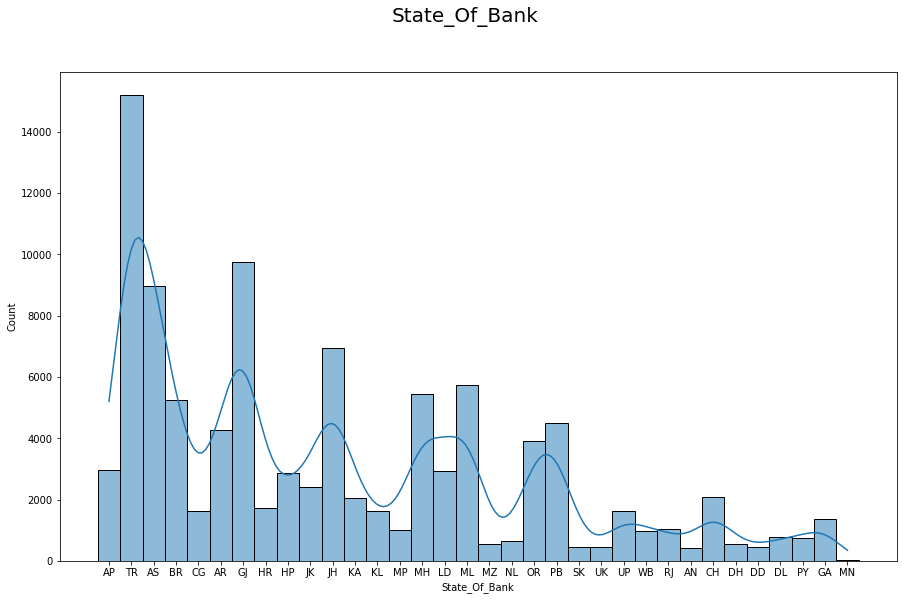

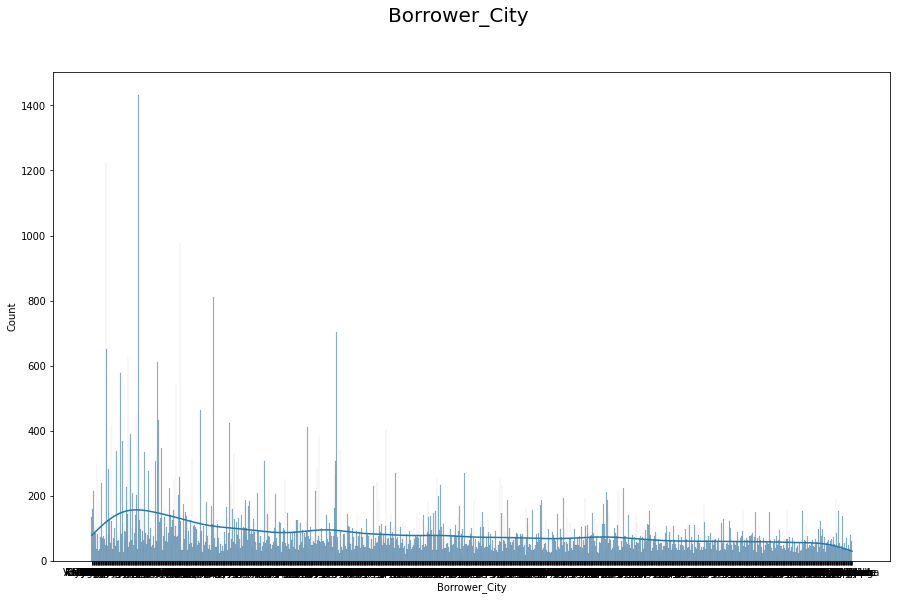

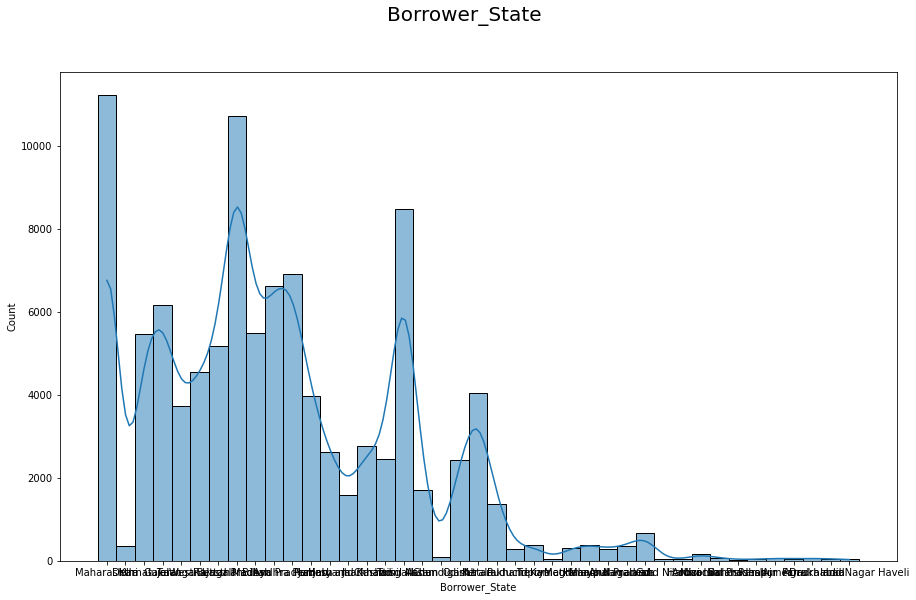

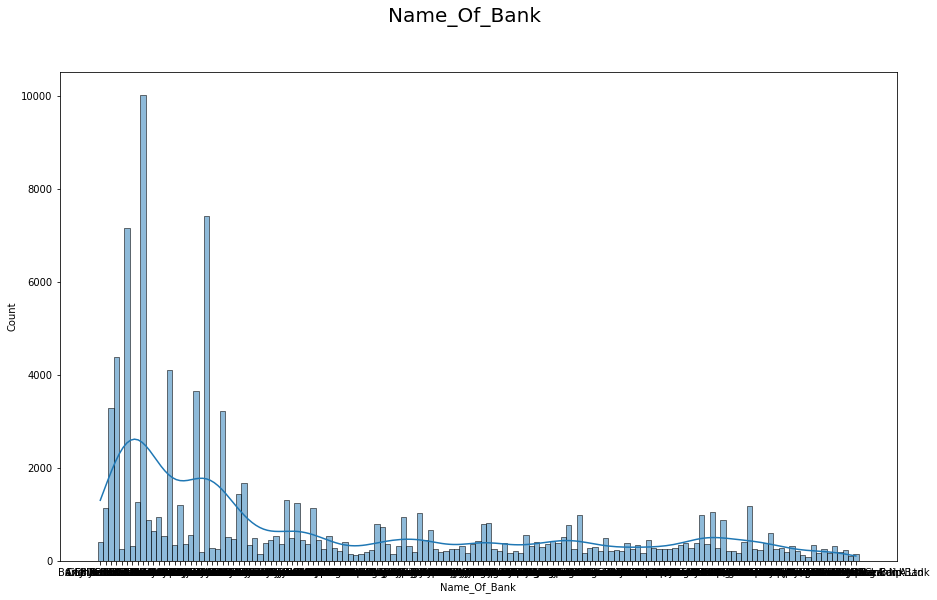

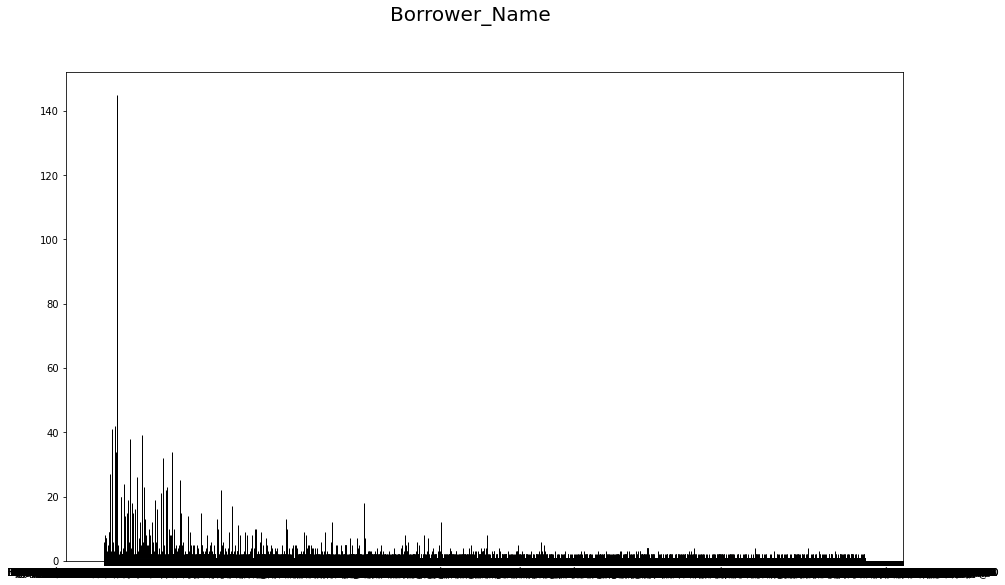

In [ ]:
hist_df(new_train)

In [ ]:
# Use pandas.to_datetime() to convert string to datetime format

new_train["Date_Of_Disbursement"] = pd.to_datetime(new_train["Date_Of_Disbursement"])
new_train["Commitment_Date"] = pd.to_datetime(new_train["Commitment_Date"])

In [ ]:
# converting Year_of_commitment to int64

new_train.loc[:,"Year_Of_Commitment"] = new_train['Year_Of_Commitment'].astype('int64')

In [11]:
new_train.dtypes

Unnamed: 0                    int64
ID                            int64
Date_Of_Disbursement         object
Jobs_Reatained                int64
Low_Documentation_Loan        int64
State_Of_Bank                object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance        float64
Count_Employees               int64
Loan_Approved_Gross         float64
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line         int64
Default                       int64
Jobs_Created                  int64
Year_Of_Commitment            int64
Borrower_Name                object
ChargedOff_Amount           float64
Classification_Code           int64
Gross_Amount_Disbursed      float64
Guaranteed_Approved_Loan    float64
Demography_Rural              int64
Demography_Undefined          int64
Demography_Urban            

In [ ]:
new_train

,ID,Date_Of_Disbursement,Jobs_Reatained,Low_Documentation_Loan,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,...,Borrower_Name,ChargedOff_Amount,Classification_Code,Gross_Amount_Disbursed,Guaranteed_Approved_Loan,Demography_Rural,Demography_Undefined,Demography_Urban,Business_Existing,Business_New
0,0,1991-07-31,0,0,AP,Mumbai,Maharashtra,0.0,38,40640000.0,...,STANDARD PARTS CORPORATION,0.00,0,40640000.00,33121600.0,0,1,0,1,0
1,1,2006-04-30,0,0,TR,Delhi,Delhi,0.0,6,43647360.0,...,FRANK & KERI AMESTOY,38283367.68,451120,43647360.00,32735520.0,0,0,1,0,1
2,2,2004-06-30,4,0,AS,Bengaluru,Karnataka,0.0,4,2844800.0,...,TELECOMMQC L L C,0.00,541618,5961400.32,1422400.0,0,0,1,1,0
3,3,2006-01-31,9,0,BR,Ahmedabad,Gujarat,0.0,7,4064000.0,...,"K & A AUTOMOTIVE, INC. DBA MUF",0.00,811112,4064000.00,2032000.0,0,0,1,0,1
4,4,2004-12-31,4,0,TR,Hyderabad,Telangana,0.0,4,30642560.0,...,SUNBEAM DELI,22862519.68,722211,30642560.00,22981920.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,104995,1998-12-31,0,1,GJ,Motipur,Bihar,0.0,1,6421120.0,...,PURPOSE PUBLISHING,0.00,541430,6421120.00,5136896.0,0,1,0,0,1
104996,104996,2003-11-30,0,1,CG,Warisaliganj,Bihar,0.0,2,8128000.0,...,NANA BEAR'S QUILTS,0.00,451130,8128000.00,6908800.0,1,0,0,0,1
104997,104997,2006-03-31,6,0,JH,Nakodar,Punjab,0.0,5,1625600.0,...,Pho 777,971296.00,722110,1625600.00,812800.0,0,0,1,0,1
104998,104998,2007-05-16,0,0,TR,Nasirabad,Rajasthan,0.0,39,10810240.0,...,FLEX TEMP CORPORATION dba LABO,0.00,561310,9916160.00,10810240.0,0,0,1,1,0


In [6]:
wilson_path = "/content/drive/MyDrive/Colab Notebooks/Project/Wilson Hackathon/"

In [ ]:
# saving the new_train dataframe to csv

new_train.to_csv(wilson_path+'new_train.csv')

loading the newly created new_train ......... Training dataset after taking care of the following

- Removing spaces from the column names
- Clubbing some of the Unique data together to create "Others"
- Removing "Rs." from the Amount columns
- Removing the Missing rows
- Dropping the rows with Business = '0'
- Dropping the rows with Low_Documentation_Loan = 'Others'
- Dropping the rows with Revolving_Credit_Line = 'Others'
- Converting the amount columns to float64
- Encoding Categorical variables Business, Low_documentation_loan, Demography & Revolving_credit_line
- Changing "Date_Of_Disbursement" & "Commitment_Date" to date_time
- Converting "Year_Of_Commitment" to int64

In [7]:
new_train = pd.read_csv(wilson_path+'new_train.csv')

In [8]:
new_train

,Unnamed: 0,ID,Date_Of_Disbursement,Jobs_Reatained,Low_Documentation_Loan,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,...,Borrower_Name,ChargedOff_Amount,Classification_Code,Gross_Amount_Disbursed,Guaranteed_Approved_Loan,Demography_Rural,Demography_Undefined,Demography_Urban,Business_Existing,Business_New
0,0,0,1991-07-31,0,0,AP,Mumbai,Maharashtra,0.0,38,...,STANDARD PARTS CORPORATION,0.00,0,40640000.00,33121600.0,0,1,0,1,0
1,1,1,2006-04-30,0,0,TR,Delhi,Delhi,0.0,6,...,FRANK & KERI AMESTOY,38283367.68,451120,43647360.00,32735520.0,0,0,1,0,1
2,2,2,2004-06-30,4,0,AS,Bengaluru,Karnataka,0.0,4,...,TELECOMMQC L L C,0.00,541618,5961400.32,1422400.0,0,0,1,1,0
3,3,3,2006-01-31,9,0,BR,Ahmedabad,Gujarat,0.0,7,...,"K & A AUTOMOTIVE, INC. DBA MUF",0.00,811112,4064000.00,2032000.0,0,0,1,0,1
4,4,4,2004-12-31,4,0,TR,Hyderabad,Telangana,0.0,4,...,SUNBEAM DELI,22862519.68,722211,30642560.00,22981920.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101274,104995,104995,1998-12-31,0,1,GJ,Motipur,Bihar,0.0,1,...,PURPOSE PUBLISHING,0.00,541430,6421120.00,5136896.0,0,1,0,0,1
101275,104996,104996,2003-11-30,0,1,CG,Warisaliganj,Bihar,0.0,2,...,NANA BEAR'S QUILTS,0.00,451130,8128000.00,6908800.0,1,0,0,0,1
101276,104997,104997,2006-03-31,6,0,JH,Nakodar,Punjab,0.0,5,...,Pho 777,971296.00,722110,1625600.00,812800.0,0,0,1,0,1
101277,104998,104998,2007-05-16,0,0,TR,Nasirabad,Rajasthan,0.0,39,...,FLEX TEMP CORPORATION dba LABO,0.00,561310,9916160.00,10810240.0,0,0,1,1,0


In [9]:
new_train.dtypes

Unnamed: 0                    int64
ID                            int64
Date_Of_Disbursement         object
Jobs_Reatained                int64
Low_Documentation_Loan        int64
State_Of_Bank                object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance        float64
Count_Employees               int64
Loan_Approved_Gross         float64
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line         int64
Default                       int64
Jobs_Created                  int64
Year_Of_Commitment            int64
Borrower_Name                object
ChargedOff_Amount           float64
Classification_Code           int64
Gross_Amount_Disbursed      float64
Guaranteed_Approved_Loan    float64
Demography_Rural              int64
Demography_Undefined          int64
Demography_Urban            

In [10]:
print("new_train shape",new_train.shape)

new_train shape (101279, 30)


In [17]:
new_train["Unnamed: 0"]

0              0
1              1
2              2
3              3
4              4
           ...  
101274    104995
101275    104996
101276    104997
101277    104998
101278    104999
Name: Unnamed: 0, Length: 101279, dtype: int64

In [18]:
Test_set_df.dtypes

ID                            int64
Date_Of_Disbursement         object
Business                     object
Jobs_Reatained                int64
Jobs_Created                  int64
Year_Of_Commitment           object
Guaranteed_Approved _Loan    object
Borrower_Name                object
Low_Documentation_Loan       object
Demography                   object
State_Of_Bank                object
ChargedOff_Amount            object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance         object
Count_Employees               int64
Classification_Code           int64
Loan_Approved_Gross          object
Gross_Amount_Disbursed       object
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line        object
dtype: object

Celaning up Test dataset

In [19]:
Test_set_df["Jobs_Created"] = Test_set_df["Jobs_Created "]
Test_set_df["Year_Of_Commitment"] = Test_set_df["Year_Of_Commitment "]
Test_set_df["Borrower_Name"] = Test_set_df["Borrower_Name "]
Test_set_df["ChargedOff_Amount"] = Test_set_df["ChargedOff_Amount "]
Test_set_df["Classification_Code"] = Test_set_df["Classification_Code "]
Test_set_df["Gross_Amount_Disbursed"] = Test_set_df["Gross_Amount_Disbursed  "]
Test_set_df["Guaranteed_Approved_Loan"] = Test_set_df["Guaranteed_Approved _Loan"]

In [20]:
print("Train set shape",Train_set_df.shape)
print("Test set shape", Test_set_df.shape)

Train set shape (105000, 26)
Test set shape (45000, 32)


In [21]:
Test_set_df.drop(['Jobs_Created ', 'Year_Of_Commitment ', 'Borrower_Name ', 'ChargedOff_Amount ', 'Classification_Code ', 'Gross_Amount_Disbursed  ','Guaranteed_Approved _Loan'], axis=1, inplace = True)

In [22]:
print("Train set shape",Train_set_df.shape)
print("Test set shape", Test_set_df.shape)

Train set shape (105000, 26)
Test set shape (45000, 25)


In [23]:
Test_set_df[Test_set_df["Date_Of_Disbursement"] == '10/31/2007 0:00']
Test_set_df.loc[:, "Date_Of_Disbursement"] = Test_set_df["Date_Of_Disbursement"].apply(lambda x: '31-Oct-07' if x == '10/31/2007 0:00' else x)
Test_set_df[Test_set_df["Date_Of_Disbursement"] == '10/31/2007 0:00']

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,...,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Jobs_Created,Year_Of_Commitment,Borrower_Name,ChargedOff_Amount,Classification_Code,Gross_Amount_Disbursed,Guaranteed_Approved_Loan


In [24]:
Test_set_df[Test_set_df["Year_Of_Commitment"] == '1976A']
Test_set_df.loc[:, "Year_Of_Commitment"] = Test_set_df["Year_Of_Commitment"].apply(lambda x: '1976' if x == '1976A' else x)
Test_set_df[Test_set_df["Year_Of_Commitment"] == '1976A']

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,...,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Jobs_Created,Year_Of_Commitment,Borrower_Name,ChargedOff_Amount,Classification_Code,Gross_Amount_Disbursed,Guaranteed_Approved_Loan


In [25]:
Test_set_df["Guaranteed_Approved_Loan"] = Test_set_df["Guaranteed_Approved_Loan"].str[3:]
Test_set_df["ChargedOff_Amount"] = Test_set_df["ChargedOff_Amount"].str[3:]
Test_set_df["Gross_Amount_Balance"] = Test_set_df["Gross_Amount_Balance"].str[3:]
Test_set_df["Loan_Approved_Gross"] = Test_set_df["Loan_Approved_Gross"].str[3:]
Test_set_df["Gross_Amount_Disbursed"] = Test_set_df["Gross_Amount_Disbursed"].str[3:]

In [26]:
Test_set_df[["Guaranteed_Approved_Loan","ChargedOff_Amount","Gross_Amount_Balance","Loan_Approved_Gross","Gross_Amount_Disbursed"]]

,Guaranteed_Approved_Loan,ChargedOff_Amount,Gross_Amount_Balance,Loan_Approved_Gross,Gross_Amount_Disbursed
0,4064000.0,8050784.0,0.0,8128000.0,9403852.16
1,1463040.0,0.0,0.0,1625600.0,1625600.0
2,812800.0,1625600.0,0.0,1625600.0,3450336.0
3,2032000.0,0.0,0.0,4064000.0,6916196.48
4,23469600.0,0.0,0.0,31292800.0,31292800.0
...,...,...,...,...,...
44995,1625600.0,1838309.76,0.0,3251200.0,2291852.16
44996,29657040.0,0.0,0.0,39542720.0,36292170.24
44997,60878720.0,0.0,0.0,60878720.0,60878720.0
44998,2032000.0,0.0,0.0,4064000.0,4064000.0


In [27]:
Test_set_df.loc[:, "Low_Documentation_Loan"] = Test_set_df["Low_Documentation_Loan"].apply(lambda x: 'Others' if x == '0' else x)
Test_set_df.loc[:, "Low_Documentation_Loan"] = Test_set_df["Low_Documentation_Loan"].apply(lambda x: 'Others' if x == 'S' else x)
Test_set_df.loc[:, "Low_Documentation_Loan"] = Test_set_df["Low_Documentation_Loan"].apply(lambda x: 'Others' if x == 'C' else x)
Test_set_df.loc[:, "Low_Documentation_Loan"] = Test_set_df["Low_Documentation_Loan"].apply(lambda x: 'Others' if x == 'A' else x)
Test_set_df.loc[:, "Low_Documentation_Loan"] = Test_set_df["Low_Documentation_Loan"].apply(lambda x: 'Others' if x == 'R' else x)

In [28]:
Test_set_df["Low_Documentation_Loan"].value_counts()

No        39476
Yes        5217
Others      174
Name: Low_Documentation_Loan, dtype: int64

In [29]:
Test_set_df.loc[:, "Revolving_Credit_Line"] = Test_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == 'T' else x)
Test_set_df.loc[:, "Revolving_Credit_Line"] = Test_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == 'R' else x)
Test_set_df.loc[:, "Revolving_Credit_Line"] = Test_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == '`' else x)
Test_set_df.loc[:, "Revolving_Credit_Line"] = Test_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == '1' else x)
Test_set_df.loc[:, "Revolving_Credit_Line"] = Test_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == '2' else x)
Test_set_df.loc[:, "Revolving_Credit_Line"] = Test_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == '4' else x)
Test_set_df.loc[:, "Revolving_Credit_Line"] = Test_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == '.' else x)
Test_set_df.loc[:, "Revolving_Credit_Line"] = Test_set_df["Revolving_Credit_Line"].apply(lambda x: 'Others' if x == 'C' else x)

In [30]:
Test_set_df["Revolving_Credit_Line"].value_counts()

No     20491
Yes    10684
Name: Revolving_Credit_Line, dtype: int64

In [31]:
Test_set_df.loc[:,"Gross_Amount_Balance"]       = Test_set_df['Gross_Amount_Balance'].astype('float64')
Test_set_df.loc[:,"Loan_Approved_Gross"]        = Test_set_df['Loan_Approved_Gross'].astype('float64')
Test_set_df.loc[:,"ChargedOff_Amount"]          = Test_set_df['ChargedOff_Amount'].astype('float64')
Test_set_df.loc[:,"Gross_Amount_Disbursed"]     = Test_set_df['Gross_Amount_Disbursed'].astype('float64')
Test_set_df.loc[:,"Guaranteed_Approved_Loan"]   = Test_set_df['Guaranteed_Approved_Loan'].astype('float64')

In [32]:
print("Test set shape", Test_set_df.shape)

Test set shape (45000, 25)


In [33]:
Test_set_df.dtypes

ID                            int64
Date_Of_Disbursement         object
Business                     object
Jobs_Reatained                int64
Low_Documentation_Loan       object
Demography                   object
State_Of_Bank                object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance        float64
Count_Employees               int64
Loan_Approved_Gross         float64
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line        object
Jobs_Created                  int64
Year_Of_Commitment           object
Borrower_Name                object
ChargedOff_Amount           float64
Classification_Code           int64
Gross_Amount_Disbursed      float64
Guaranteed_Approved_Loan    float64
dtype: object

In [37]:
Unq_obj(Test_set_df)

% S unique values Date_Of_Disbursement
30-Apr-95    463
31-Jul-95    456
31-Mar-06    398
31-Oct-94    398
31-Aug-07    397
            ... 
27-Aug-97      1
28-Mar-02      1
28-Apr-00      1
5-May-82       1
9-Aug-02       1
Name: Date_Of_Disbursement, Length: 2139, dtype: int64

% S unique values Business
Existing    32062
New         12878
0              54
Name: Business, dtype: int64

% S unique values Low_Documentation_Loan
No        39476
Yes        5217
Others      174
Name: Low_Documentation_Loan, dtype: int64

% S unique values Demography
Urban        24586
Undefined    15020
Rural         5394
Name: Demography, dtype: int64

% S unique values State_Of_Bank
TR    6603
GJ    4686
AS    3796
JH    3123
ML    2605
MH    2412
BR    2365
AR    1967
PB    1925
OR    1571
LD    1343
AP    1307
HP    1250
JK    1087
CH    1005
KA     914
KL     762
UP     739
CG     700
HR     688
GA     593
WB     434
RJ     425
MP     407
DL     378
PY     330
NL     280
MZ     259
DD     227
DH   

In [39]:
# Encoding all the Categorical variables 

#classifying the categorical variables into 2 variants (Label encoding & One Hot encoding)

replaceStruct1 = {
                "Low_Documentation_Loan": {"No": 0, "Yes": 1, "Others": -1},
                "Revolving_Credit_Line":  {"No": 0, "Yes": 1},                
                }
oneHotCols1 = ["Demography","Business"]

In [40]:
new_test=Test_set_df.replace(replaceStruct1)
new_test=pd.get_dummies(new_test, columns=oneHotCols1)
new_test.head(10)

,ID,Date_Of_Disbursement,Jobs_Reatained,Low_Documentation_Loan,State_Of_Bank,Borrower_City,Borrower_State,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,...,ChargedOff_Amount,Classification_Code,Gross_Amount_Disbursed,Guaranteed_Approved_Loan,Demography_Rural,Demography_Undefined,Demography_Urban,Business_0,Business_Existing,Business_New
0,105000,31-Mar-06,19,0.0,GJ,Safidon,Haryana,0.0,17,8128000.0,...,8050784.00,326199,9403852.16,4064000.0,0,0,1,0,1,0
1,105001,31-Jan-95,0,1.0,AS,Nanjikottai,Tamil Nadu,0.0,2,1625600.0,...,0.00,0,1625600.00,1463040.0,0,1,0,0,1,0
2,105002,30-Sep-06,7,0.0,ML,Tonk,Rajasthan,0.0,2,1625600.0,...,1625600.00,541611,3450336.00,812800.0,0,0,1,0,1,0
3,105003,31-Jul-00,2,0.0,TR,Musabani,Jharkhand,0.0,2,4064000.0,...,0.00,0,6916196.48,2032000.0,0,0,1,0,0,1
4,105004,30-Jun-05,0,0.0,TR,Adityapur,Jharkhand,0.0,6,31292800.0,...,0.00,441310,31292800.00,23469600.0,1,0,0,0,1,0
5,105005,31-Jan-94,0,0.0,JH,Mandla,Madhya Pradesh,0.0,4,16256000.0,...,0.00,114112,16256000.00,13817600.0,0,1,0,0,1,0
6,105006,30-Sep-96,0,0.0,ML,Amalapuram,Andhra Pradesh,0.0,2,20320000.0,...,4356689.28,0,20320000.00,15240000.0,0,1,0,0,0,1
7,105007,31-Mar-08,6,0.0,OR,Anantapur,Andhra Pradesh,0.0,5,4064000.0,...,3893474.56,561730,10395630.72,2032000.0,0,0,1,0,1,0
8,105008,1-May-13,2,0.0,CH,Sangli,Maharashtra,0.0,2,6502400.0,...,0.00,722211,6502400.00,5527040.0,0,0,1,0,0,1
9,105009,31-Aug-05,3,0.0,PB,Mandi,Himachal Pradesh,0.0,3,6096000.0,...,4172021.12,561612,16421486.08,3048000.0,0,0,1,0,0,1


In [42]:
# Use pandas.to_datetime() to convert string to datetime format

new_test["Date_Of_Disbursement"] = pd.to_datetime(new_test["Date_Of_Disbursement"])
new_test["Commitment_Date"] = pd.to_datetime(new_test["Commitment_Date"])

In [43]:
# converting Year_of_commitment to int64

new_test.loc[:,"Year_Of_Commitment"] = new_test['Year_Of_Commitment'].astype('int64')

In [76]:
chk_miss(new_test)

column is  Low_Documentation_Loan
% missing 0.29555555555555557

column is  Borrower_State
% missing 0.10888888888888888

column is  Revolving_Credit_Line
% missing 30.72222222222222

column is  Borrower_Name
% missing 0.0044444444444444444



In [174]:
# Checking for missing values in new_test
print('Number of missing values in Test set across columns-\n', new_test.isnull().sum())

Number of missing values in Test set across columns-
 ID                          0
Jobs_Reatained              0
Low_Documentation_Loan      0
Gross_Amount_Balance        0
Count_Employees             0
Loan_Approved_Gross         0
Loan_Term                   0
Primary_Loan_Digit          0
Code_Franchise              0
Revolving_Credit_Line       0
Jobs_Created                0
Year_Of_Commitment          0
ChargedOff_Amount           0
Classification_Code         0
Gross_Amount_Disbursed      0
Guaranteed_Approved_Loan    0
Demography_Rural            0
Demography_Undefined        0
Demography_Urban            0
Business_Existing           0
Business_New                0
dtype: int64


In [93]:
print("new_train shape",new_train.shape)
print("new_test shape",new_test.shape)

new_train shape (101279, 29)
new_test shape (45000, 28)


In [78]:
new_test["Low_Documentation_Loan"].value_counts()

 0.0    39476
 1.0     5217
-1.0      174
Name: Low_Documentation_Loan, dtype: int64

In [79]:
# filling a null values using fillna()

new_test["Low_Documentation_Loan"].fillna(-1, inplace = True)

In [80]:
new_test["Low_Documentation_Loan"].value_counts()

 0.0    39476
 1.0     5217
-1.0      307
Name: Low_Documentation_Loan, dtype: int64

In [88]:
# will replace Nan value in dataframe with value "NA" 

new_test["Borrower_State"].fillna("NA", inplace = True)

In [91]:
new_test["Borrower_Name"].fillna("NA", inplace = True)

In [82]:
new_test["Revolving_Credit_Line"].value_counts()

0.0    20491
1.0    10684
Name: Revolving_Credit_Line, dtype: int64

In [95]:
# filling a null values using fillna()

new_test["Revolving_Credit_Line"].fillna(-1, inplace = True)

In [96]:
new_test["Revolving_Credit_Line"].value_counts()

 0.0    20491
-1.0    13825
 1.0    10684
Name: Revolving_Credit_Line, dtype: int64

In [97]:
print("new_train shape",new_train.shape)
print("new_test shape",new_test.shape)

new_train shape (101279, 29)
new_test shape (45000, 28)


In [56]:
# Use pandas.to_datetime() to convert string to datetime format

new_test["Date_Of_Disbursement"] = pd.to_datetime(new_test["Date_Of_Disbursement"])
new_test["Commitment_Date"] = pd.to_datetime(new_test["Commitment_Date"])

In [99]:
new_test.dtypes

ID                                   int64
Jobs_Reatained                       int64
Low_Documentation_Loan             float64
State_Of_Bank                       object
Borrower_City                       object
Borrower_State                      object
Gross_Amount_Balance               float64
Count_Employees                      int64
Loan_Approved_Gross                float64
Loan_Term                            int64
Commitment_Date             datetime64[ns]
Primary_Loan_Digit                   int64
Code_Franchise                       int64
Name_Of_Bank                        object
Revolving_Credit_Line              float64
Jobs_Created                         int64
Year_Of_Commitment                   int64
Borrower_Name                       object
ChargedOff_Amount                  float64
Classification_Code                  int64
Gross_Amount_Disbursed             float64
Guaranteed_Approved_Loan           float64
Demography_Rural                     uint8
Demography_

In [68]:
new_test.drop("Date_Of_Disbursement", axis=1, inplace=True)

In [71]:
new_train.drop("Date_Of_Disbursement", axis=1, inplace=True)

In [100]:
print("new_train shape",new_train.shape)
print("new_test shape",new_test.shape)

new_train shape (101279, 29)
new_test shape (45000, 28)


writing new_test to a csv

In [101]:
new_test.to_csv(wilson_path+"new_test_2.csv")

In [112]:
new_train.dtypes

Unnamed: 0                    int64
ID                            int64
Jobs_Reatained                int64
Low_Documentation_Loan        int64
Gross_Amount_Balance        float64
Count_Employees               int64
Loan_Approved_Gross         float64
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Revolving_Credit_Line         int64
Default                       int64
Jobs_Created                  int64
Year_Of_Commitment            int64
ChargedOff_Amount           float64
Classification_Code           int64
Gross_Amount_Disbursed      float64
Guaranteed_Approved_Loan    float64
Demography_Rural              int64
Demography_Undefined          int64
Demography_Urban              int64
Business_Existing             int64
Business_New                  int64
dtype: object

In [109]:
new_train.drop(["State_Of_Bank", "Borrower_City", "Borrower_State", "Name_Of_Bank", "Borrower_Name"], axis=1, inplace=True)

In [110]:
new_test.drop(["State_Of_Bank", "Borrower_City", "Borrower_State", "Name_Of_Bank", "Borrower_Name"], axis=1, inplace=True)

In [114]:
new_train.drop(["Unnamed: 0"], axis=1, inplace=True)

In [133]:
new_train["Commitment_Date"] = pd.to_datetime(new_train["Commitment_Date"])

In [138]:
new_train.drop(["Commitment_Date"], axis=1, inplace=True)
new_test.drop(["Commitment_Date"], axis=1, inplace=True)


In [163]:
new_train.dtypes

ID                            int64
Jobs_Reatained                int64
Low_Documentation_Loan        int64
Gross_Amount_Balance        float64
Count_Employees               int64
Loan_Approved_Gross         float64
Loan_Term                     int64
Primary_Loan_Digit            int64
Code_Franchise                int64
Revolving_Credit_Line         int64
Default                       int64
Jobs_Created                  int64
Year_Of_Commitment            int64
ChargedOff_Amount           float64
Classification_Code           int64
Gross_Amount_Disbursed      float64
Guaranteed_Approved_Loan    float64
Demography_Rural              int64
Demography_Undefined          int64
Demography_Urban              int64
Business_Existing             int64
Business_New                  int64
dtype: object

In [164]:
new_test.dtypes

ID                            int64
Jobs_Reatained                int64
Low_Documentation_Loan      float64
Gross_Amount_Balance        float64
Count_Employees               int64
Loan_Approved_Gross         float64
Loan_Term                     int64
Primary_Loan_Digit            int64
Code_Franchise                int64
Revolving_Credit_Line       float64
Jobs_Created                  int64
Year_Of_Commitment            int64
ChargedOff_Amount           float64
Classification_Code           int64
Gross_Amount_Disbursed      float64
Guaranteed_Approved_Loan    float64
Demography_Rural              uint8
Demography_Undefined          uint8
Demography_Urban              uint8
Business_0                    uint8
Business_Existing             uint8
Business_New                  uint8
dtype: object

In [165]:
new_test.drop(["Business_0"], axis=1, inplace=True)

In [166]:
print("new_train shape",new_train.shape)
print("new_test shape",new_test.shape)

new_train shape (101279, 22)
new_test shape (45000, 21)


In [ ]:
#Function to accept dataframe and then print pie charts for all Categorical columns

def pie_df(df):
        
    for col2 in df.select_dtypes(include=['object']).columns:
        df.groupby(col2).size().plot(kind='pie', subplots=True, shadow=True, startangle=30, figsize=(12,9), autopct='%1.2f%%')                
        font1 = {'family':'serif','color':'blue','size':20}
        plt.title(col2, fontdict = font1)    
        plt.tight_layout()
        plt.show()

2. Exploratory data analysis

In [103]:
new_train.duplicated().sum()

0

In [104]:
new_test.duplicated().sum()

0

In [120]:
def chk_box(df):

    for i in df.columns:    
        print("column is",i)
        fig = plt.figure(figsize = (6,4))
        plt.figure(i)
        fig.suptitle(i, fontsize=20)
        df[i].plot.box()
        plt.show()

column is ID


<Figure size 432x288 with 0 Axes>

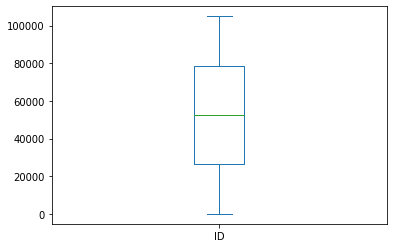

column is Jobs_Reatained


<Figure size 432x288 with 0 Axes>

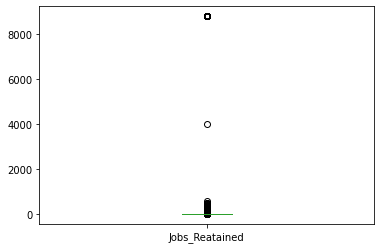

column is Low_Documentation_Loan


<Figure size 432x288 with 0 Axes>

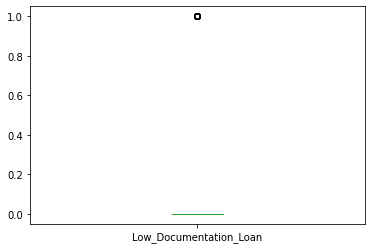

column is Gross_Amount_Balance


<Figure size 432x288 with 0 Axes>

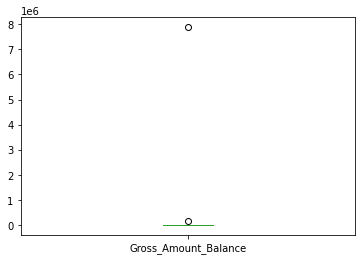

column is Count_Employees


<Figure size 432x288 with 0 Axes>

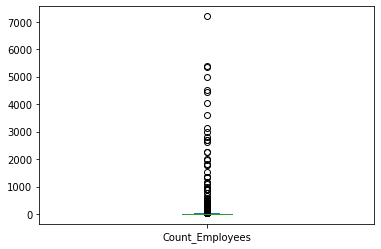

column is Loan_Approved_Gross


<Figure size 432x288 with 0 Axes>

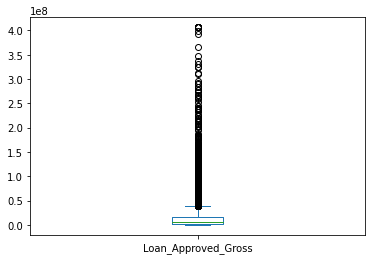

column is Loan_Term


<Figure size 432x288 with 0 Axes>

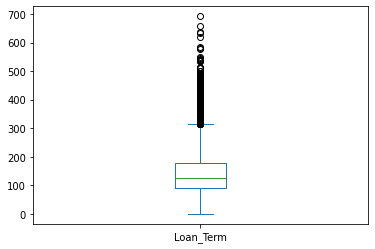

column is Primary_Loan_Digit


<Figure size 432x288 with 0 Axes>

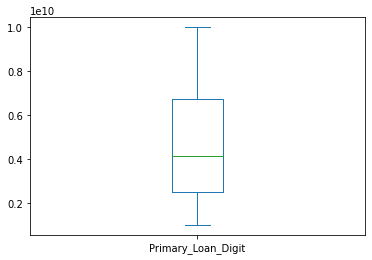

column is Code_Franchise


<Figure size 432x288 with 0 Axes>

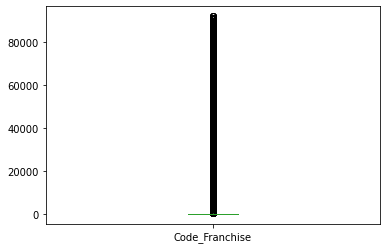

column is Revolving_Credit_Line


<Figure size 432x288 with 0 Axes>

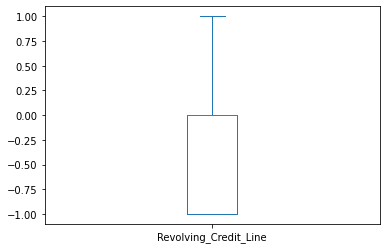

column is Default


<Figure size 432x288 with 0 Axes>

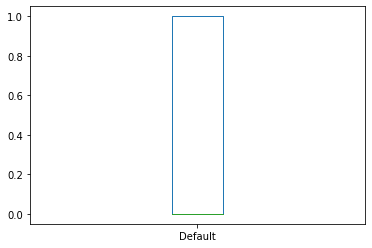

column is Jobs_Created


<Figure size 432x288 with 0 Axes>

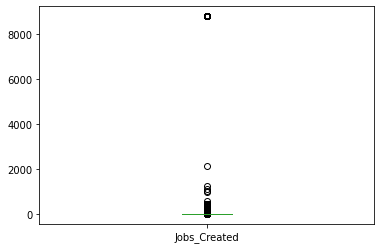

column is Year_Of_Commitment


<Figure size 432x288 with 0 Axes>

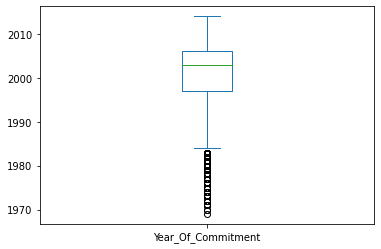

column is ChargedOff_Amount


<Figure size 432x288 with 0 Axes>

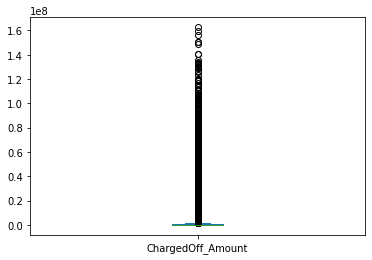

column is Classification_Code


<Figure size 432x288 with 0 Axes>

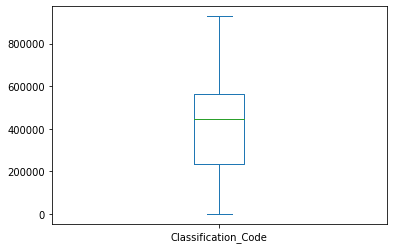

column is Gross_Amount_Disbursed


<Figure size 432x288 with 0 Axes>

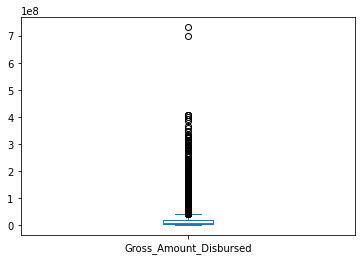

column is Guaranteed_Approved_Loan


<Figure size 432x288 with 0 Axes>

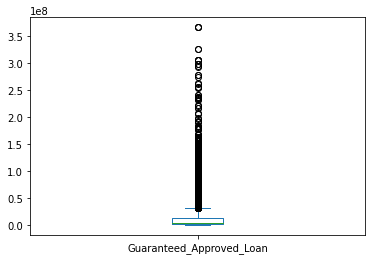

column is Demography_Rural


<Figure size 432x288 with 0 Axes>

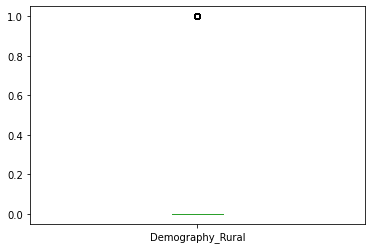

column is Demography_Undefined


<Figure size 432x288 with 0 Axes>

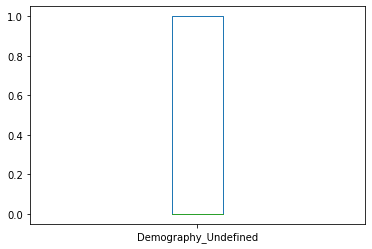

column is Demography_Urban


<Figure size 432x288 with 0 Axes>

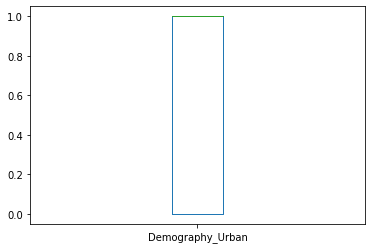

column is Business_Existing


<Figure size 432x288 with 0 Axes>

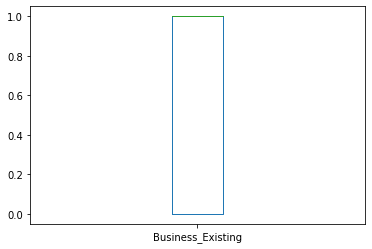

column is Business_New


<Figure size 432x288 with 0 Axes>

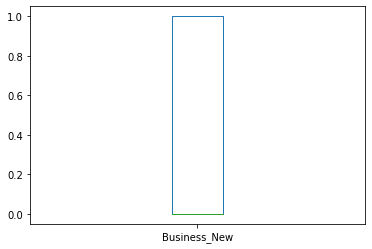

In [167]:
chk_box(new_train)

column is ID


<Figure size 432x288 with 0 Axes>

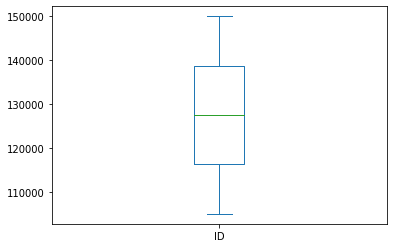

column is Jobs_Reatained


<Figure size 432x288 with 0 Axes>

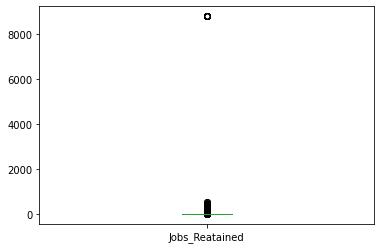

column is Low_Documentation_Loan


<Figure size 432x288 with 0 Axes>

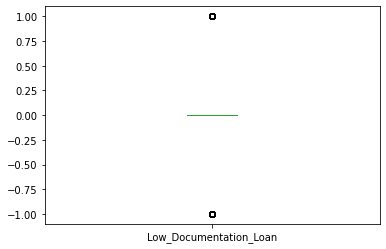

column is Gross_Amount_Balance


<Figure size 432x288 with 0 Axes>

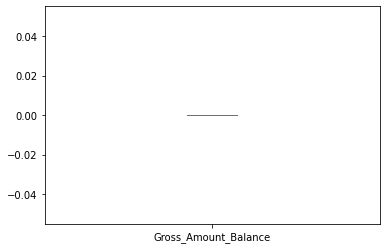

column is Count_Employees


<Figure size 432x288 with 0 Axes>

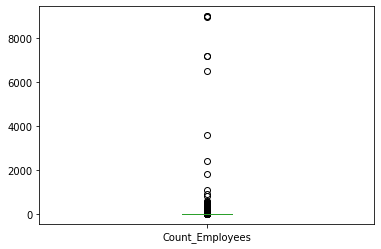

column is Loan_Approved_Gross


<Figure size 432x288 with 0 Axes>

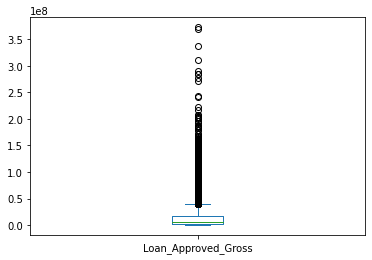

column is Loan_Term


<Figure size 432x288 with 0 Axes>

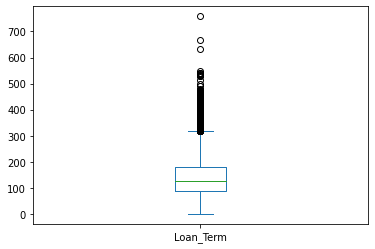

column is Primary_Loan_Digit


<Figure size 432x288 with 0 Axes>

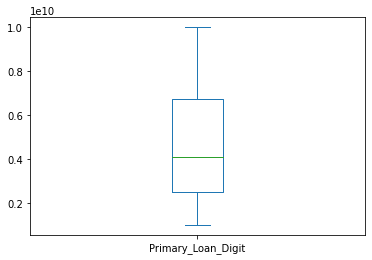

column is Code_Franchise


<Figure size 432x288 with 0 Axes>

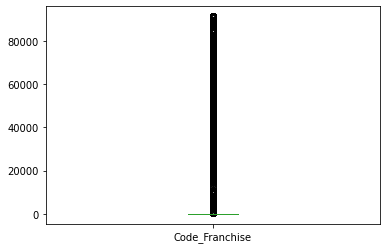

column is Revolving_Credit_Line


<Figure size 432x288 with 0 Axes>

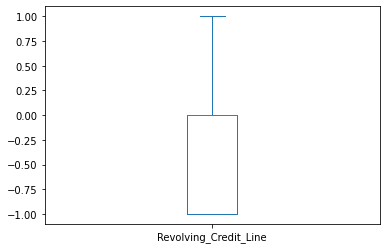

column is Jobs_Created


<Figure size 432x288 with 0 Axes>

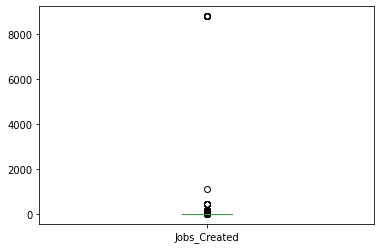

column is Year_Of_Commitment


<Figure size 432x288 with 0 Axes>

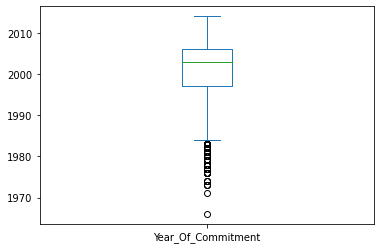

column is ChargedOff_Amount


<Figure size 432x288 with 0 Axes>

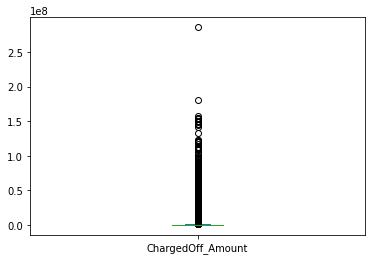

column is Classification_Code


<Figure size 432x288 with 0 Axes>

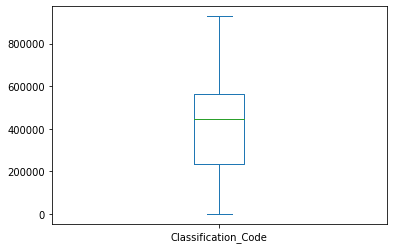

column is Gross_Amount_Disbursed


<Figure size 432x288 with 0 Axes>

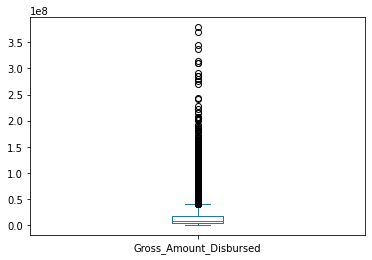

column is Guaranteed_Approved_Loan


<Figure size 432x288 with 0 Axes>

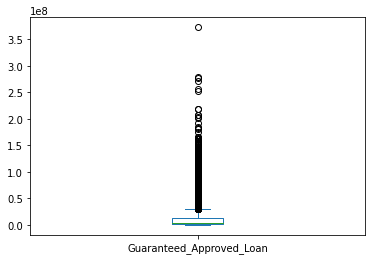

column is Demography_Rural


<Figure size 432x288 with 0 Axes>

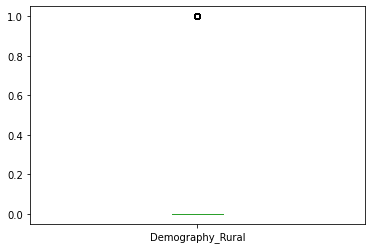

column is Demography_Undefined


<Figure size 432x288 with 0 Axes>

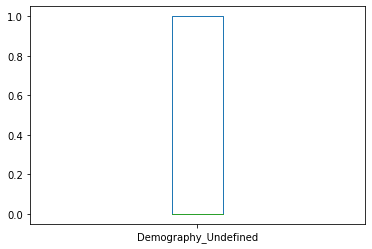

column is Demography_Urban


<Figure size 432x288 with 0 Axes>

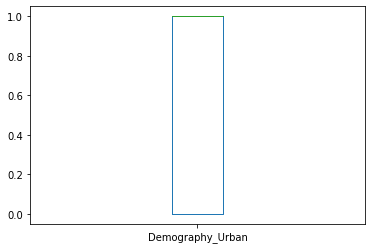

column is Business_Existing


<Figure size 432x288 with 0 Axes>

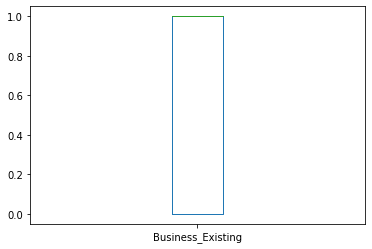

column is Business_New


<Figure size 432x288 with 0 Axes>

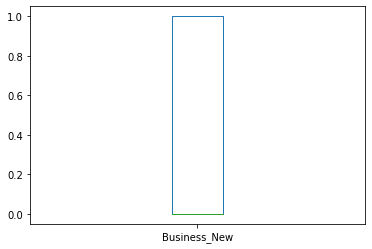

In [168]:
chk_box(new_test)

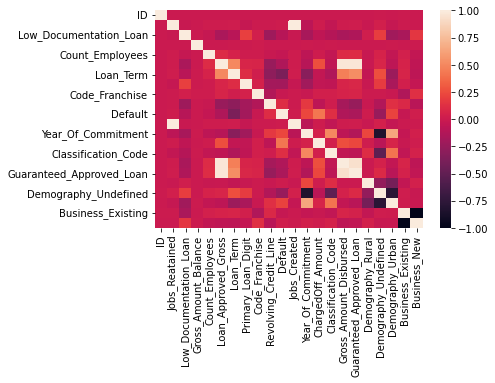

In [169]:
sns.heatmap(new_train.corr());

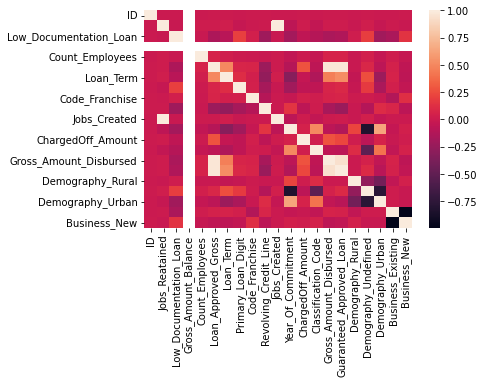

In [170]:
sns.heatmap(new_test.corr());

3. Model building

In [127]:
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import imblearn 
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

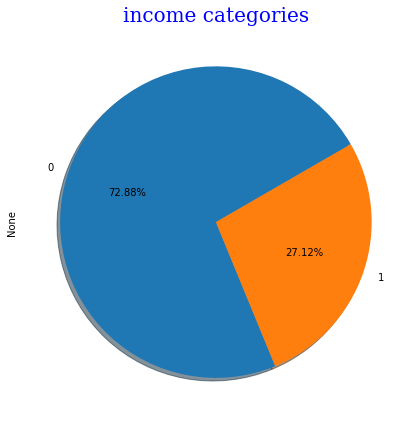

In [128]:
#Checking for imbalance in Target variable (income)

new_train.groupby('Default').size().plot(kind='pie', subplots=True, shadow=True, startangle=30, figsize=(8,6), autopct='%1.2f%%')
font1 = {'family':'serif','color':'blue','size':20}
plt.title("income categories", fontdict = font1)    
                
plt.tight_layout()
plt.show()

In [129]:
new_train["Default"].value_counts()

0    73817
1    27462
Name: Default, dtype: int64

There is a lot of imbalance in Default (Target variable) .... 73% - 0 & 27% - 1

this has to be corrected else the algorithm will not predict properly and will biased towards Default = 1

In [145]:
#   Segregating Predictors and Target attributes

X = new_train.drop(["Default","ID"], axis=1)   #........... Independent variables / Predictors attribute, 
y = new_train['Default']    

In [146]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [147]:
y.value_counts()    #........... the imbalance has been corrected now..........

0    73817
1    73817
Name: Default, dtype: int64

In [148]:
print("X.shape",X.shape)
print("y.shape",y.shape)

X.shape (147634, 20)
y.shape (147634,)


In [149]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Jobs_Reatained,147634.0,1.497444e+01,2.908316e+02,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,8.800000e+03
Low_Documentation_Loan,147634.0,8.450628e-02,2.781465e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Gross_Amount_Balance,147634.0,5.432174e+01,2.050320e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.876682e+06
Count_Employees,147634.0,8.706822e+00,5.043812e+01,0.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00,7.200000e+03
Loan_Approved_Gross,147634.0,1.337657e+07,2.119612e+07,8.128000e+04,2.258139e+06,5.316053e+06,1.454912e+07,4.064000e+08
Loan_Term,147634.0,1.347605e+02,1.081262e+02,0.000000e+00,6.600000e+01,1.040000e+02,1.490000e+02,6.920000e+02
Primary_Loan_Digit,147634.0,4.411160e+09,2.536157e+09,1.000034e+09,2.322889e+09,3.565434e+09,6.417187e+09,9.996003e+09
Code_Franchise,147634.0,2.605877e+03,1.185193e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.200600e+04
Revolving_Credit_Line,147634.0,-8.141756e-03,6.813967e-01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Jobs_Created,147634.0,1.267418e+01,2.907605e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.800000e+03


In [150]:
#  ... Standardizing the Data

X_scaled = X.apply(zscore)

In [151]:
X_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Jobs_Reatained,147634.0,-2.388385e-18,1.000003,-0.051489,-0.051489,-0.048050,-0.037735,30.206678
Low_Documentation_Loan,147634.0,1.232094e-17,1.000003,-0.303820,-0.303820,-0.303820,-0.303820,3.291419
Gross_Amount_Balance,147634.0,-2.297016e-18,1.000003,-0.002649,-0.002649,-0.002649,-0.002649,384.167048
Count_Employees,147634.0,-2.490658e-18,1.000003,-0.172624,-0.132972,-0.093319,-0.014014,142.577035
Loan_Approved_Gross,147634.0,-1.096612e-16,1.000003,-0.627253,-0.524552,-0.380284,0.055319,18.542296
Loan_Term,147634.0,8.201125e-17,1.000003,-1.246330,-0.635930,-0.284488,0.131694,5.153620
Primary_Loan_Digit,147634.0,-3.657779e-18,1.000003,-1.345002,-0.823402,-0.333468,0.790974,2.202096
Code_Franchise,147634.0,-8.181873e-19,1.000003,-0.219870,-0.219870,-0.219786,-0.219786,7.543113
Revolving_Credit_Line,147634.0,-1.498005e-17,1.000003,-1.455630,0.011949,0.011949,0.011949,1.479528
Jobs_Created,147634.0,1.851750e-17,1.000003,-0.043590,-0.043590,-0.043590,-0.040151,30.221977


In [152]:
Original_X_scaled = X_scaled.copy()

In [153]:
#.... ..... Train & Validation splitting of Data......... in 80% Train & 20% Validation

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=.20, random_state=1)

In [154]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("")
print("X_val shape",X_val.shape)
print("y_val shape",y_val.shape)

X_train shape (118107, 20)
y_train shape (118107,)

X_val shape (29527, 20)
y_val shape (29527,)


Model 1 :  Logisitc Regression

In [155]:
# .... Train Logistic Regression model

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Fit the model on train
model_lr = LogisticRegression(solver="liblinear")
# model_lr = LogisticRegression(C=100, class_weight=None, dual=False,
#                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                    max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=None, solver='saga', tol=0.0001, verbose=0,
#                    warm_start=False)
model_lr.fit(X_train, y_train)
#predict on test
y_pred_logit = model_lr.predict(X_val)

coef_df = pd.DataFrame(model_lr.coef_)
coef_df['intercept'] = model_lr.intercept_
print(coef_df)

          0         1         2         3         4        5        6  \
0 -1.207996 -0.444892 -0.035726 -0.117252 -6.863491 -1.75016 -0.08686   

          7         8         9  ...        11       12        13        14  \
0 -0.140341 -0.277506  1.303173  ...  40.37008  0.04534 -2.100741  6.473863   

         15        16        17        18        19  intercept  
0 -2.083191 -3.107906 -3.369179 -3.599632 -3.186568  12.230263  

[1 rows x 21 columns]


In [156]:
model_score_train = model_lr.score(X_train, y_train)
print(model_score_train)

0.987765331436748


In [157]:
model_score_valid = model_lr.score(X_val, y_val)
print(model_score_valid)

0.9873336268500017


In [158]:
print("Logistic regression - Accuracy ",metrics.accuracy_score(y_val, y_pred_logit))
print("Logistic regression - Precision",metrics.precision_score(y_val, y_pred_logit))
print("Logistic regression - Recall   ",metrics.recall_score(y_val, y_pred_logit))
print("Logistic regression - F1 score ",metrics.f1_score(y_val, y_pred_logit))
print("Logistic regression - ROC      ",metrics.roc_auc_score(y_val, y_pred_logit))

Logistic regression - Accuracy  0.9873336268500017
Logistic regression - Precision 0.9946093483452747
Logistic regression - Recall    0.9801627328357205
Logistic regression - F1 score  0.9873331978595137
Logistic regression - ROC       0.9873862244964628


In [181]:
#Predicting the actual Test_data which has been given separately

X_test = new_test.drop(["ID"], axis=1)
X_test_scaled = X_test.apply(zscore, nan_policy='omit')

In [182]:
X_test["Gross_Amount_Balance"].value_counts()

0.0    45000
Name: Gross_Amount_Balance, dtype: int64

In [183]:
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Jobs_Reatained,45000.0,1.142024e+01,2.490329e+02,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,8.800000e+03
Low_Documentation_Loan,45000.0,1.091111e-01,3.329456e-01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Gross_Amount_Balance,45000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Count_Employees,45000.0,1.032893e+01,9.748401e+01,0.000000e+00,2.000000e+00,4.000000e+00,9.000000e+00,8.999000e+03
Loan_Approved_Gross,45000.0,1.504715e+07,2.262118e+07,8.128000e+04,2.438400e+06,6.502400e+06,1.706880e+07,3.724250e+08
Loan_Term,45000.0,1.558597e+02,1.162111e+02,0.000000e+00,8.800000e+01,1.260000e+02,1.800000e+02,7.580000e+02
Primary_Loan_Digit,45000.0,4.650410e+09,2.537430e+09,1.000534e+09,2.486456e+09,4.098569e+09,6.720642e+09,9.995473e+09
Code_Franchise,45000.0,2.778932e+03,1.284372e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.135000e+04
Revolving_Credit_Line,45000.0,-6.980000e-02,7.347002e-01,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Jobs_Created,45000.0,8.985000e+00,2.489388e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.800000e+03


In [184]:
X_test_scaled

,Jobs_Reatained,Low_Documentation_Loan,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,Loan_Term,Primary_Loan_Digit,Code_Franchise,Revolving_Credit_Line,Jobs_Created,Year_Of_Commitment,ChargedOff_Amount,Classification_Code,Gross_Amount_Disbursed,Guaranteed_Approved_Loan,Demography_Rural,Demography_Undefined,Demography_Urban,Business_Existing,Business_New
0,0.030437,-0.327718,NaN,0.068433,-0.305874,-0.850700,-1.161655,-0.216367,1.456120,-0.036094,0.761827,0.892625,-0.308846,-0.280142,-0.416595,-0.369041,-0.707814,0.911213,0.635241,-0.633174
1,-0.045859,2.675809,NaN,-0.085440,-0.593324,-0.566731,1.284157,-0.216290,0.095006,-0.036094,-1.087322,-0.253885,-1.566087,-0.620583,-0.560584,-0.369041,1.412801,-1.097438,0.635241,-0.633174
2,-0.017750,-0.327718,NaN,-0.085440,-0.593324,-0.644177,-0.902019,-0.216290,1.456120,-0.016008,0.761827,-0.022384,0.521398,-0.540717,-0.596581,-0.369041,-0.707814,0.911213,0.635241,-0.633174
3,-0.037828,-0.327718,NaN,-0.085440,-0.485530,-1.186300,-0.329371,-0.216290,1.456120,-0.036094,-0.246800,-0.253885,-1.566087,-0.389022,-0.529087,-0.369041,-0.707814,0.911213,-1.574207,1.579345
4,-0.045859,-0.327718,NaN,-0.044407,0.718169,0.543330,1.647289,-0.216290,0.095006,-0.036094,0.593722,-0.253885,0.134816,0.677902,0.657699,2.709724,-0.707814,-1.097438,0.635241,-0.633174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.033812,-0.327718,NaN,-0.075182,-0.521462,-0.644177,1.767660,-0.216290,1.456120,-0.032077,0.593722,0.007908,0.066905,-0.591422,-0.551585,-0.369041,-0.707814,0.911213,0.635241,-0.633174
44996,0.002328,-0.327718,NaN,0.017142,1.082872,0.207730,0.332554,-0.216290,-1.266109,-0.036094,0.089409,-0.253885,0.828189,0.896716,1.000235,-0.369041,-0.707814,0.911213,0.635241,-0.633174
44997,-0.045859,-0.327718,NaN,-0.064924,2.026069,1.756652,-0.561757,-0.216290,-1.266109,0.024163,1.098035,-0.253885,0.827808,1.972829,2.728667,-0.369041,-0.707814,0.911213,0.635241,-0.633174
44998,-0.037828,-0.327718,NaN,-0.085440,-0.485530,-0.566731,0.550632,-0.216290,-1.266109,-0.036094,0.257514,-0.253885,0.149501,-0.513858,-0.529087,-0.369041,-0.707814,0.911213,0.635241,-0.633174


In [185]:
X_test_scaled["Gross_Amount_Balance"] = X_test_scaled["Gross_Amount_Balance"].fillna(0)

In [186]:
X_test_scaled

,Jobs_Reatained,Low_Documentation_Loan,Gross_Amount_Balance,Count_Employees,Loan_Approved_Gross,Loan_Term,Primary_Loan_Digit,Code_Franchise,Revolving_Credit_Line,Jobs_Created,Year_Of_Commitment,ChargedOff_Amount,Classification_Code,Gross_Amount_Disbursed,Guaranteed_Approved_Loan,Demography_Rural,Demography_Undefined,Demography_Urban,Business_Existing,Business_New
0,0.030437,-0.327718,0.0,0.068433,-0.305874,-0.850700,-1.161655,-0.216367,1.456120,-0.036094,0.761827,0.892625,-0.308846,-0.280142,-0.416595,-0.369041,-0.707814,0.911213,0.635241,-0.633174
1,-0.045859,2.675809,0.0,-0.085440,-0.593324,-0.566731,1.284157,-0.216290,0.095006,-0.036094,-1.087322,-0.253885,-1.566087,-0.620583,-0.560584,-0.369041,1.412801,-1.097438,0.635241,-0.633174
2,-0.017750,-0.327718,0.0,-0.085440,-0.593324,-0.644177,-0.902019,-0.216290,1.456120,-0.016008,0.761827,-0.022384,0.521398,-0.540717,-0.596581,-0.369041,-0.707814,0.911213,0.635241,-0.633174
3,-0.037828,-0.327718,0.0,-0.085440,-0.485530,-1.186300,-0.329371,-0.216290,1.456120,-0.036094,-0.246800,-0.253885,-1.566087,-0.389022,-0.529087,-0.369041,-0.707814,0.911213,-1.574207,1.579345
4,-0.045859,-0.327718,0.0,-0.044407,0.718169,0.543330,1.647289,-0.216290,0.095006,-0.036094,0.593722,-0.253885,0.134816,0.677902,0.657699,2.709724,-0.707814,-1.097438,0.635241,-0.633174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.033812,-0.327718,0.0,-0.075182,-0.521462,-0.644177,1.767660,-0.216290,1.456120,-0.032077,0.593722,0.007908,0.066905,-0.591422,-0.551585,-0.369041,-0.707814,0.911213,0.635241,-0.633174
44996,0.002328,-0.327718,0.0,0.017142,1.082872,0.207730,0.332554,-0.216290,-1.266109,-0.036094,0.089409,-0.253885,0.828189,0.896716,1.000235,-0.369041,-0.707814,0.911213,0.635241,-0.633174
44997,-0.045859,-0.327718,0.0,-0.064924,2.026069,1.756652,-0.561757,-0.216290,-1.266109,0.024163,1.098035,-0.253885,0.827808,1.972829,2.728667,-0.369041,-0.707814,0.911213,0.635241,-0.633174
44998,-0.037828,-0.327718,0.0,-0.085440,-0.485530,-0.566731,0.550632,-0.216290,-1.266109,-0.036094,0.257514,-0.253885,0.149501,-0.513858,-0.529087,-0.369041,-0.707814,0.911213,0.635241,-0.633174


In [187]:
print("X_scaled shape",X_scaled.shape)
print("X_test_scaled", X_test_scaled.shape)

X_scaled shape (147634, 20)
X_test_scaled (45000, 20)


In [188]:
y_pred_test_logit = model_lr.predict(X_test_scaled)

In [189]:
y_pred_test_logit

array([1, 1, 1, ..., 0, 1, 1])

In [190]:
unique, counts = np.unique(y_pred_test_logit, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[    0  8036]
 [    1 36964]]


In [191]:
Logit_test_pred = Test_set_df["ID"]

In [192]:
pred_df = pd.DataFrame(y_pred_test_logit)

In [193]:
pred_df.value_counts()

1    36964
0     8036
dtype: int64

In [194]:
Logit_test_pred.count()

45000

In [195]:
Logit_test_pred.shape

(45000,)

In [196]:
#reset index 
Logit_test_pred = Logit_test_pred.reset_index(drop=True)
pred_df         = pred_df.reset_index(drop=True)

In [197]:
result = pd.concat([Logit_test_pred,pred_df],axis=1)

In [198]:
result.shape

(45000, 2)

In [200]:
result.columns = ['ID', 'Default']

In [202]:
result["Default"].value_counts()

1    36964
0     8036
Name: Default, dtype: int64

In [203]:
result.to_csv(wilson_path+'Ramesh_Gopinath_logistic_prediction_1.csv', index=False)

In [244]:
# .... Train Logistic Regression model

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Fit the model on train
# model_lr = LogisticRegression(solver="liblinear")
model_lr_2 = LogisticRegression(C=100, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
model_lr_2.fit(X_train, y_train)
#predict on test
y_pred_logit_2 = model_lr_2.predict(X_val)

coef_df_2 = pd.DataFrame(model_lr_2.coef_)
coef_df_2['intercept'] = model_lr_2.intercept_
print(coef_df_2)

          0         1         2         3         4        5         6  \
0 -0.068402 -0.327568 -0.019824 -0.172211 -1.145728 -1.89977 -0.199159   

          7         8         9  ...         11        12        13        14  \
0 -0.099227 -0.208623  0.177569  ...  14.599231  0.032208 -1.493098  0.353001   

         15        16       17        18        19  intercept  
0 -1.312367 -1.973616 -2.01683 -2.118649 -1.895053   3.034295  

[1 rows x 21 columns]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [245]:
model_score_train_2 = model_lr_2.score(X_train, y_train)
print(model_score_train_2)

model_score_valid_2 = model_lr_2.score(X_val, y_val)
print(model_score_valid_2)

0.9761487464756534
0.9750736613946558


In [246]:
print("Logistic regression - Accuracy ",metrics.accuracy_score(y_val, y_pred_logit_2))
print("Logistic regression - Precision",metrics.precision_score(y_val, y_pred_logit_2))
print("Logistic regression - Recall   ",metrics.recall_score(y_val, y_pred_logit_2))
print("Logistic regression - F1 score ",metrics.f1_score(y_val, y_pred_logit_2))
print("Logistic regression - ROC      ",metrics.roc_auc_score(y_val, y_pred_logit_2))

Logistic regression - Accuracy  0.9750736613946558
Logistic regression - Precision 0.9909008821282211
Logistic regression - Recall    0.9593167910698676
Logistic regression - F1 score  0.974853081864152
Logistic regression - ROC       0.9751892361462876


In [247]:
y_pred_test_logit_2 = model_lr_2.predict(X_test_scaled)
print(y_pred_test_logit_2)
unique, counts = np.unique(y_pred_test_logit_2, return_counts=True)

result_2 = np.column_stack((unique, counts)) 
print (result_2)

[1 1 1 ... 0 1 1]
[[    0 16190]
 [    1 28810]]


In [248]:
Logit_test_pred_2 = Test_set_df["ID"]
pred_df_2 = pd.DataFrame(y_pred_test_logit_2)

pred_df_2.value_counts()

#reset index 
Logit_test_pred_2 = Logit_test_pred_2.reset_index(drop=True)
pred_df_2         = pred_df_2.reset_index(drop=True)
result_2 = pd.concat([Logit_test_pred_2,pred_df_2],axis=1)
result_2.columns = ['ID', 'Default']
result_2.to_csv(wilson_path+'Ramesh_Gopinath_logistic_prediction_2.csv', index=False)

In [249]:
result_2["Default"].value_counts()

1    28810
0    16190
Name: Default, dtype: int64

Model - 2 XGBoost

In [204]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb_mod = XGBClassifier(use_label_encoder=False)
# xgb_mod = XGBClassifier(
#  learning_rate =0.12,
#  n_estimators=650,
#  max_depth=3,
#  min_child_weight=6,
#  gamma=0.8,
#  subsample=1,
#  colsample_bytree=0.8,
#  objective='binary:logistic',
#  nthread=4,
#  use_label_encoder=False,
#  scale_pos_weight=1,seed=27)

xgb_mod.fit(X_train,y_train)

print("XGB train score",xgb_mod.score(X_train,y_train))
print("XGB Validation score",xgb_mod.score(X_val,y_val))

y_pred_xgb = xgb_mod.predict(X_val)

print("with XGBoost - Accuracy ",metrics.accuracy_score(y_val, y_pred_xgb))
print("with XGBoost - Precision",metrics.precision_score(y_val, y_pred_xgb))
print("with XGBoost - Recall   ",metrics.recall_score(y_val, y_pred_xgb))
print("with XGBoost - F1 score ",metrics.f1_score(y_val, y_pred_xgb))
print("with XGBoost - ROC      ",metrics.roc_auc_score(y_val, y_pred_xgb))

XGB train score 0.996232230096438
XGB Validation score 0.9962407288244658
with XGBoost - Accuracy  0.9962407288244658
with XGBoost - Precision 0.9937115333154937
with XGBoost - Recall    0.99885683545155
with XGBoost - F1 score  0.996277541165029
with XGBoost - ROC       0.9962215399965174


In [208]:
#Predicting the actual Test_data which has been given separately

X_test = new_test.drop(["ID"], axis=1)
X_test_scaled = X_test.apply(zscore)

y_pred_test_xgb = xgb_mod.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_xgb, return_counts=True)

result_xgb = np.column_stack((unique, counts)) 
print ("result xgb",result_xgb)


result xgb [[    1 45000]]


In [206]:
xgb_test_pred = Test_set_df["ID"]
xgb_pred_df = pd.DataFrame(y_pred_test_xgb)
#reset index 
xgb_test_pred = xgb_test_pred.reset_index(drop=True)
xgb_pred_df   = xgb_pred_df.reset_index(drop=True)

result_data_xgb = pd.concat([xgb_test_pred,xgb_pred_df],axis=1)

result_data_xgb.columns = ['ID', 'Default']

result_data_xgb.to_csv(wilson_path+'Ramesh_Gopinath_xgb_prediction_1.csv', index=False)

In [209]:
result_data_xgb["Default"].value_counts()

1    45000
Name: Default, dtype: int64

In [214]:
new_test["Gross_Amount_Balance"].value_counts()

0.0    45000
Name: Gross_Amount_Balance, dtype: int64

#Model 3 - GradientBoostingClassifier

In [210]:
from sklearn.ensemble import GradientBoostingClassifier

#gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.001, random_state=1)
gbcl = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=5, min_samples_split=600,min_samples_leaf=40, subsample=0.90, random_state=10, max_features=11)
#gbcl = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)
gbcl = gbcl.fit(X_train, y_train)

print("gbcl train score",gbcl.score(X_train,y_train))
print("gbcl validation score",gbcl.score(X_val,y_val))

y_pred_gbcl = gbcl.predict(X_val)

print("GBCL - 100, rate=0.05 - Accuracy ",metrics.accuracy_score(y_val, y_pred_gbcl))
print("GBCL - 100, rate=0.05 - Precision",metrics.precision_score(y_val, y_pred_gbcl))
print("GBCL - 100, rate=0.05 - Recall   ",metrics.recall_score(y_val, y_pred_gbcl))
print("GBCL - 100, rate=0.05 - F1 score ",metrics.f1_score(y_val, y_pred_gbcl))
print("GBCL - 100, rate=0.05 - ROC      ",metrics.roc_auc_score(y_val, y_pred_gbcl))

gbcl train score 0.9962660976910768
gbcl validation score 0.996206861516578
GBCL - 100, rate=0.05 - Accuracy  0.996206861516578
GBCL - 100, rate=0.05 - Precision 0.9937111125978457
GBCL - 100, rate=0.05 - Recall    0.9987895904781118
GBCL - 100, rate=0.05 - F1 score  0.9962438795358508
GBCL - 100, rate=0.05 - ROC       0.9961879175097982


In [212]:
#Predicting the actual Test_data which has been given separately

X_test = new_test.drop(["ID"], axis=1)
X_test_scaled = X_test.apply(zscore)
X_test_scaled["Gross_Amount_Balance"] = X_test_scaled["Gross_Amount_Balance"].fillna(0)

y_pred_test_gbcl = gbcl.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_gbcl, return_counts=True)

result_gbcl = np.column_stack((unique, counts)) 
print("result gbcl",result_gbcl)


result gbcl [[    1 45000]]


Model 4 - KNN Classifier

In [213]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

# NNH_1 = KNeighborsClassifier(n_neighbors= 3, weights = 'uniform', leaf_size=7,p=2 )
NNH_1 = KNeighborsClassifier()

NNH_1.fit(X_train, y_train)
NNH_pred_1 = NNH_1.predict(X_val)

print("NNH 1 train score",NNH_1.score(X_train,y_train))
print("NNH 1 validation score",NNH_1.score(X_val,y_val))
print("")

print("KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - Accuracy ",metrics.accuracy_score(y_val, NNH_pred_1))
print("KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - Precision",metrics.precision_score(y_val, NNH_pred_1))
print("KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - Recall   ",metrics.recall_score(y_val, NNH_pred_1))
print("KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - F1 score ",metrics.f1_score(y_val, NNH_pred_1))
print("KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - ROC      ",metrics.roc_auc_score(y_val, NNH_pred_1))

NNH 1 train score 0.9725503145452852
NNH 1 validation score 0.9601381786161818

KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - Accuracy  0.9601381786161818
KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - Precision 0.9680749248017501
KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - Recall    0.9522560688588528
KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - F1 score  0.9601003423844876
KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - ROC       0.9601959929447103


In [216]:
#Predicting the actual Test_data which has been given separately

y_pred_test_NNH_1 = NNH_1.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_NNH_1, return_counts=True)

result_NNH_1 = np.column_stack((unique, counts)) 
print("result NNH 1",result_NNH_1)

result NNH 1 [[    0 28342]
 [    1 16658]]


In [217]:
NNH_1_test_pred = Test_set_df["ID"]
NNH_1_pred_df = pd.DataFrame(y_pred_test_NNH_1)
#reset index 
NNH_1_test_pred = NNH_1_test_pred.reset_index(drop=True)
NNH_1_pred_df   = NNH_1_pred_df.reset_index(drop=True)

result_data_NNH_1 = pd.concat([NNH_1_test_pred,NNH_1_pred_df],axis=1)

result_data_NNH_1.columns = ['ID', 'Default']

result_data_NNH_1.to_csv(wilson_path+'Ramesh_Gopinath_NNH_prediction_1.csv', index=False)

In [218]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_2 = KNeighborsClassifier(n_neighbors= 7, weights = 'distance', leaf_size=5,p=2 )

NNH_2.fit(X_train, y_train)
NNH_pred_2 = NNH_2.predict(X_val)

print("NNH 2 train score",NNH_2.score(X_train,y_train))
print("NNH 2 validation score",NNH_2.score(X_val,y_val))
print("")

print("KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - Accuracy ",metrics.accuracy_score(y_val, NNH_pred_2))
print("KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - Precision",metrics.precision_score(y_val, NNH_pred_2))
print("KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - Recall   ",metrics.recall_score(y_val, NNH_pred_2))
print("KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - F1 score ",metrics.f1_score(y_val, NNH_pred_2))
print("KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - ROC      ",metrics.roc_auc_score(y_val, NNH_pred_2))

NNH 2 train score 1.0
NNH 2 validation score 0.9621024824736681

KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - Accuracy  0.9621024824736681
KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - Precision 0.9699289229086933
KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - Recall    0.9543406630354381
KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - F1 score  0.9620716537301292
KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - ROC       0.9621594144871514


In [219]:
#Predicting the actual Test_data which has been given separately

y_pred_test_NNH_2 = NNH_2.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_NNH_2, return_counts=True)

result_NNH_2 = np.column_stack((unique, counts)) 
print("result NNH 2",result_NNH_2)

result NNH 2 [[    0 28681]
 [    1 16319]]


In [220]:
NNH_2_test_pred = Test_set_df["ID"]
NNH_2_pred_df = pd.DataFrame(y_pred_test_NNH_2)
#reset index 
NNH_2_test_pred = NNH_2_test_pred.reset_index(drop=True)
NNH_2_pred_df   = NNH_2_pred_df.reset_index(drop=True)

result_data_NNH_2 = pd.concat([NNH_2_test_pred,NNH_2_pred_df],axis=1)

result_data_NNH_2.columns = ['ID', 'Default']

result_data_NNH_2.to_csv(wilson_path+'Ramesh_Gopinath_NNH_prediction_2.csv', index=False)

In [239]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_3 = KNeighborsClassifier(n_neighbors= 5, weights = 'uniform', leaf_size=7,p=1 )

NNH_3.fit(X_train, y_train)
NNH_pred_3 = NNH_3.predict(X_val)

print("NNH 3 train score",NNH_3.score(X_train,y_train))
print("NNH 3 validation score",NNH_3.score(X_val,y_val))
print("")

print("KNN with neighbours=5, weights=uniform, leaf_size=7, p=1 - Accuracy ",metrics.accuracy_score(y_val, NNH_pred_3))
print("KNN with neighbours=5, weights=uniform, leaf_size=7, p=1 - Precision",metrics.precision_score(y_val, NNH_pred_3))
print("KNN with neighbours=5, weights=uniform, leaf_size=7, p=1 - Recall   ",metrics.recall_score(y_val, NNH_pred_3))
print("KNN with neighbours=5, weights=uniform, leaf_size=7, p=1 - F1 score ",metrics.f1_score(y_val, NNH_pred_3))
print("KNN with neighbours=5, weights=uniform, leaf_size=7, p=1 - ROC      ",metrics.roc_auc_score(y_val, NNH_pred_3))

NNH 3 train score 0.9751665862311294
NNH 3 validation score 0.9632878382497375

KNN with neighbours=5, weights=uniform, leaf_size=7, p=1 - Accuracy  0.9632878382497375
KNN with neighbours=5, weights=uniform, leaf_size=7, p=1 - Precision 0.9779518824100395
KNN with neighbours=5, weights=uniform, leaf_size=7, p=1 - Recall    0.9484903503463116
KNN with neighbours=5, weights=uniform, leaf_size=7, p=1 - F1 score  0.9629958353246398
KNN with neighbours=5, weights=uniform, leaf_size=7, p=1 - ROC       0.9633963760465183


In [240]:
#Predicting the actual Test_data which has been given separately

y_pred_test_NNH_3 = NNH_3.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_NNH_3, return_counts=True)

result_NNH_3 = np.column_stack((unique, counts)) 
print("result NNH 3",result_NNH_3)

result NNH 3 [[    0 28226]
 [    1 16774]]


In [241]:
NNH_3_test_pred = Test_set_df["ID"]
NNH_3_pred_df = pd.DataFrame(y_pred_test_NNH_3)
#reset index 
NNH_3_test_pred = NNH_3_test_pred.reset_index(drop=True)
NNH_3_pred_df   = NNH_3_pred_df.reset_index(drop=True)

result_data_NNH_3 = pd.concat([NNH_3_test_pred,NNH_3_pred_df],axis=1)

result_data_NNH_3.columns = ['ID', 'Default']

result_data_NNH_3.to_csv(wilson_path+'Ramesh_Gopinath_NNH_prediction_3.csv', index=False)

In [250]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_4 = KNeighborsClassifier(n_neighbors= 7, weights = 'distance', leaf_size=7,p=2 )

NNH_4.fit(X_train, y_train)
NNH_pred_4 = NNH_4.predict(X_val)

print("NNH 4 train score",NNH_4.score(X_train,y_train))
print("NNH 4 validation score",NNH_4.score(X_val,y_val))
print("")

print("KNN 4 - Accuracy ",metrics.accuracy_score(y_val, NNH_pred_4))
print("KNN 4 - Precision",metrics.precision_score(y_val, NNH_pred_4))
print("KNN 4 - Recall   ",metrics.recall_score(y_val, NNH_pred_4))
print("KNN 4 - F1 score ",metrics.f1_score(y_val, NNH_pred_4))
print("KNN 4 - ROC      ",metrics.roc_auc_score(y_val, NNH_pred_4))

NNH 4 train score 1.0
NNH 4 validation score 0.9621024824736681

KNN 4 - Accuracy  0.9621024824736681
KNN 4 - Precision 0.9699289229086933
KNN 4 - Recall    0.9543406630354381
KNN 4 - F1 score  0.9620716537301292
KNN 4 - ROC       0.9621594144871514


In [251]:
#Predicting the actual Test_data which has been given separately

y_pred_test_NNH_4 = NNH_4.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_NNH_4, return_counts=True)

result_NNH_4 = np.column_stack((unique, counts)) 
print("result NNH 4",result_NNH_4)

result NNH 4 [[    0 28681]
 [    1 16319]]


In [253]:
NNH_4_test_pred = Test_set_df["ID"]
NNH_4_pred_df = pd.DataFrame(y_pred_test_NNH_4)
#reset index 
NNH_4_test_pred = NNH_4_test_pred.reset_index(drop=True)
NNH_4_pred_df   = NNH_4_pred_df.reset_index(drop=True)

result_data_NNH_4 = pd.concat([NNH_4_test_pred,NNH_4_pred_df],axis=1)

result_data_NNH_4.columns = ['ID', 'Default']

result_data_NNH_4.to_csv(wilson_path+'Ramesh_Gopinath_NNH_prediction_4.csv', index=False)

In [254]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_5 = KNeighborsClassifier(n_neighbors= 3, weights = 'distance', leaf_size=7,p=2 )

NNH_5.fit(X_train, y_train)
NNH_pred_5 = NNH_5.predict(X_val)

print("NNH 5 train score",NNH_5.score(X_train,y_train))
print("NNH 5 validation score",NNH_5.score(X_val,y_val))
print("")

print("KNN 5 - Accuracy ",metrics.accuracy_score(y_val, NNH_pred_5))
print("KNN 5 - Precision",metrics.precision_score(y_val, NNH_pred_5))
print("KNN 5 - Recall   ",metrics.recall_score(y_val, NNH_pred_5))
print("KNN 5 - F1 score ",metrics.f1_score(y_val, NNH_pred_5))
print("KNN 5 - ROC      ",metrics.roc_auc_score(y_val, NNH_pred_5))

NNH 5 train score 1.0
NNH 5 validation score 0.963795847868053

KNN 5 - Accuracy  0.963795847868053
KNN 5 - Precision 0.9694557823129252
KNN 5 - Recall    0.958308116468294
KNN 5 - F1 score  0.9638497176287578
KNN 5 - ROC       0.9638360997188631


In [255]:
#Predicting the actual Test_data which has been given separately

y_pred_test_NNH_5 = NNH_5.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_NNH_5, return_counts=True)

result_NNH_5 = np.column_stack((unique, counts)) 
print("result NNH 5",result_NNH_5)

result NNH 5 [[    0 27872]
 [    1 17128]]


In [256]:
NNH_5_test_pred = Test_set_df["ID"]
NNH_5_pred_df = pd.DataFrame(y_pred_test_NNH_5)
#reset index 
NNH_5_test_pred = NNH_5_test_pred.reset_index(drop=True)
NNH_5_pred_df   = NNH_5_pred_df.reset_index(drop=True)

result_data_NNH_5 = pd.concat([NNH_5_test_pred,NNH_5_pred_df],axis=1)

result_data_NNH_5.columns = ['ID', 'Default']

result_data_NNH_5.to_csv(wilson_path+'Ramesh_Gopinath_NNH_prediction_5.csv', index=False)

In [257]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_6 = KNeighborsClassifier(n_neighbors= 9, weights = 'distance', leaf_size=7,p=2 )

NNH_6.fit(X_train, y_train)
NNH_pred_6 = NNH_6.predict(X_val)

print("NNH 6 train score",NNH_6.score(X_train,y_train))
print("NNH 6 validation score",NNH_6.score(X_val,y_val))
print("")

print("KNN 6 - Accuracy ",metrics.accuracy_score(y_val, NNH_pred_6))
print("KNN 6 - Precision",metrics.precision_score(y_val, NNH_pred_6))
print("KNN 6 - Recall   ",metrics.recall_score(y_val, NNH_pred_6))
print("KNN 6 - F1 score ",metrics.f1_score(y_val, NNH_pred_6))
print("KNN 6 - ROC      ",metrics.roc_auc_score(y_val, NNH_pred_6))

NNH 6 train score 1.0
NNH 6 validation score 0.9606123209266095

KNN 6 - Accuracy  0.9606123209266095
KNN 6 - Precision 0.9695807070430255
KNN 6 - Recall    0.9516508640979087
KNN 6 - F1 score  0.9605321206773678
KNN 6 - ROC       0.9606780521362906


In [258]:
#Predicting the actual Test_data which has been given separately

y_pred_test_NNH_6 = NNH_6.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_NNH_6, return_counts=True)

result_NNH_6 = np.column_stack((unique, counts)) 
print("result NNH 6",result_NNH_6)

result NNH 6 [[    0 28911]
 [    1 16089]]


In [259]:
NNH_6_test_pred = Test_set_df["ID"]
NNH_6_pred_df = pd.DataFrame(y_pred_test_NNH_6)
#reset index 
NNH_6_test_pred = NNH_6_test_pred.reset_index(drop=True)
NNH_6_pred_df   = NNH_6_pred_df.reset_index(drop=True)

result_data_NNH_6 = pd.concat([NNH_6_test_pred,NNH_6_pred_df],axis=1)

result_data_NNH_6.columns = ['ID', 'Default']

result_data_NNH_6.to_csv(wilson_path+'Ramesh_Gopinath_NNH_prediction_6.csv', index=False)

In [260]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_7 = KNeighborsClassifier(n_neighbors= 11, weights = 'distance', leaf_size=7,p=2 )

NNH_7.fit(X_train, y_train)
NNH_pred_7 = NNH_7.predict(X_val)

print("NNH 7 train score",NNH_7.score(X_train,y_train))
print("NNH 7 validation score",NNH_7.score(X_val,y_val))
print("")

print("KNN 7 - Accuracy ",metrics.accuracy_score(y_val, NNH_pred_7))
print("KNN 7 - Precision",metrics.precision_score(y_val, NNH_pred_7))
print("KNN 7 - Recall   ",metrics.recall_score(y_val, NNH_pred_7))
print("KNN 7 - F1 score ",metrics.f1_score(y_val, NNH_pred_7))
print("KNN 7 - ROC      ",metrics.roc_auc_score(y_val, NNH_pred_7))

NNH 7 train score 1.0
NNH 7 validation score 0.9589189555322247

KNN 7 - Accuracy  0.9589189555322247
KNN 7 - Precision 0.9679961622807017
KNN 7 - Recall    0.9498352498150763
KNN 7 - F1 score  0.9588297186301462
KNN 7 - ROC       0.958985583422822


In [261]:
#Predicting the actual Test_data which has been given separately

y_pred_test_NNH_7 = NNH_7.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_NNH_7, return_counts=True)

result_NNH_7 = np.column_stack((unique, counts)) 
print("result NNH 7",result_NNH_7)

result NNH 7 [[    0 29095]
 [    1 15905]]


In [262]:
NNH_7_test_pred = Test_set_df["ID"]
NNH_7_pred_df = pd.DataFrame(y_pred_test_NNH_7)
#reset index 
NNH_7_test_pred = NNH_7_test_pred.reset_index(drop=True)
NNH_7_pred_df   = NNH_7_pred_df.reset_index(drop=True)

result_data_NNH_7 = pd.concat([NNH_7_test_pred,NNH_7_pred_df],axis=1)

result_data_NNH_7.columns = ['ID', 'Default']

result_data_NNH_7.to_csv(wilson_path+'Ramesh_Gopinath_NNH_prediction_7.csv', index=False)

In [263]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_8 = KNeighborsClassifier(n_neighbors= 17, weights = 'distance', leaf_size=7,p=2 )

NNH_8.fit(X_train, y_train)
NNH_pred_8 = NNH_8.predict(X_val)

print("NNH 8 train score",NNH_8.score(X_train,y_train))
print("NNH 8 validation score",NNH_8.score(X_val,y_val))
print("")

print("KNN 8 - Accuracy ",metrics.accuracy_score(y_val, NNH_pred_8))
print("KNN 8 - Precision",metrics.precision_score(y_val, NNH_pred_8))
print("KNN 8 - Recall   ",metrics.recall_score(y_val, NNH_pred_8))
print("KNN 8 - F1 score ",metrics.f1_score(y_val, NNH_pred_8))
print("KNN 8 - ROC      ",metrics.roc_auc_score(y_val, NNH_pred_8))

NNH 8 train score 1.0
NNH 8 validation score 0.9562434382090967

KNN 8 - Accuracy  0.9562434382090967
KNN 8 - Precision 0.9671781462877589
KNN 8 - Recall    0.9451953466478381
KNN 8 - F1 score  0.9560603999455858
KNN 8 - ROC       0.9563244746339626


In [264]:
#Predicting the actual Test_data which has been given separately

y_pred_test_NNH_8 = NNH_8.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_NNH_8, return_counts=True)

result_NNH_8 = np.column_stack((unique, counts)) 
print("result NNH 8",result_NNH_8)

result NNH 8 [[    0 29587]
 [    1 15413]]


In [265]:
NNH_8_test_pred = Test_set_df["ID"]
NNH_8_pred_df = pd.DataFrame(y_pred_test_NNH_8)
#reset index 
NNH_8_test_pred = NNH_8_test_pred.reset_index(drop=True)
NNH_8_pred_df   = NNH_8_pred_df.reset_index(drop=True)

result_data_NNH_8 = pd.concat([NNH_8_test_pred,NNH_8_pred_df],axis=1)

result_data_NNH_8.columns = ['ID', 'Default']

result_data_NNH_8.to_csv(wilson_path+'Ramesh_Gopinath_NNH_prediction_8.csv', index=False)

In [266]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_9 = KNeighborsClassifier(n_neighbors= 21, weights = 'distance', leaf_size=9,p=2 )

NNH_9.fit(X_train, y_train)
NNH_pred_9 = NNH_9.predict(X_val)

print("NNH 9 train score",NNH_9.score(X_train,y_train))
print("NNH 9 validation score",NNH_9.score(X_val,y_val))
print("")

print("KNN 9 - Accuracy ",metrics.accuracy_score(y_val, NNH_pred_9))
print("KNN 9 - Precision",metrics.precision_score(y_val, NNH_pred_9))
print("KNN 9 - Recall   ",metrics.recall_score(y_val, NNH_pred_9))
print("KNN 9 - F1 score ",metrics.f1_score(y_val, NNH_pred_9))
print("KNN 9 - ROC      ",metrics.roc_auc_score(y_val, NNH_pred_9))

NNH 9 train score 1.0
NNH 9 validation score 0.9540081958885088

KNN 9 - Accuracy  0.9540081958885088
KNN 9 - Precision 0.9654839820874956
KNN 9 - Recall    0.9423710577634322
KNN 9 - F1 score  0.9537875178656503
KNN 9 - ROC       0.9540935528991834


In [267]:
#Predicting the actual Test_data which has been given separately

y_pred_test_NNH_9 = NNH_9.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_NNH_9, return_counts=True)

result_NNH_9 = np.column_stack((unique, counts)) 
print("result NNH 9",result_NNH_9)

result NNH 9 [[    0 29740]
 [    1 15260]]


In [268]:
NNH_9_test_pred = Test_set_df["ID"]
NNH_9_pred_df = pd.DataFrame(y_pred_test_NNH_9)
#reset index 
NNH_9_test_pred = NNH_9_test_pred.reset_index(drop=True)
NNH_9_pred_df   = NNH_9_pred_df.reset_index(drop=True)

result_data_NNH_9 = pd.concat([NNH_9_test_pred,NNH_9_pred_df],axis=1)

result_data_NNH_9.columns = ['ID', 'Default']

result_data_NNH_9.to_csv(wilson_path+'Ramesh_Gopinath_NNH_prediction_9.csv', index=False)

In [269]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_10 = KNeighborsClassifier(n_neighbors= 25, weights = 'distance', leaf_size=9,p=1 )

NNH_10.fit(X_train, y_train)
NNH_pred_10 = NNH_10.predict(X_val)

print("NNH 10 train score",NNH_10.score(X_train,y_train))
print("NNH 10 validation score",NNH_10.score(X_val,y_val))
print("")

print("KNN 10 - Accuracy ",metrics.accuracy_score(y_val, NNH_pred_10))
print("KNN 10 - Precision",metrics.precision_score(y_val, NNH_pred_10))
print("KNN 10 - Recall   ",metrics.recall_score(y_val, NNH_pred_10))
print("KNN 10 - F1 score ",metrics.f1_score(y_val, NNH_pred_10))
print("KNN 10 - ROC      ",metrics.roc_auc_score(y_val, NNH_pred_10))

NNH 10 train score 1.0
NNH 10 validation score 0.956988518982626

KNN 10 - Accuracy  0.956988518982626
KNN 10 - Precision 0.9763255585907403
KNN 10 - Recall    0.9373276847555645
KNN 10 - F1 score  0.9564292575819953
KNN 10 - ROC       0.9571327288406644


In [270]:
#Predicting the actual Test_data which has been given separately

y_pred_test_NNH_10 = NNH_10.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_NNH_10, return_counts=True)

result_NNH_10 = np.column_stack((unique, counts)) 
print("result NNH 10",result_NNH_10)

result NNH 10 [[    0 29503]
 [    1 15497]]


In [271]:
NNH_10_test_pred = Test_set_df["ID"]
NNH_10_pred_df = pd.DataFrame(y_pred_test_NNH_10)
#reset index 
NNH_10_test_pred = NNH_10_test_pred.reset_index(drop=True)
NNH_10_pred_df   = NNH_10_pred_df.reset_index(drop=True)

result_data_NNH_10 = pd.concat([NNH_10_test_pred,NNH_10_pred_df],axis=1)

result_data_NNH_10.columns = ['ID', 'Default']

result_data_NNH_10.to_csv(wilson_path+'Ramesh_Gopinath_NNH_prediction_10.csv', index=False)

Model 5 - Catboost

In [221]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 416 kB/s 


In [222]:
from sklearn import metrics

from sklearn.metrics import roc_auc_score

In [223]:
from catboost import CatBoostClassifier

model_cat_1 = CatBoostClassifier(iterations=40,
                           learning_rate=0.2,
                           depth=11)
# Fit model
model_cat_1.fit(X_train, y_train)

print("Cat Boost 1 train score",model_cat_1.score(X_train,y_train))
print("Cat Boost 1 validation score",model_cat_1.score(X_val,y_val))
print("")

# Get predicted classes
cat_pred_1 = model_cat_1.predict(X_val)
# Get predicted probabilities for each class
cat_pred_proba = model_cat_1.predict_proba(X_val)
# Get predicted RawFormulaVal
cat_pred_raw = model_cat_1.predict(X_val, prediction_type='RawFormulaVal')

print("Cat Boost 1 - Accuracy ",metrics.accuracy_score(y_val, cat_pred_1))
print("Cat Boost 1 - Precision",metrics.precision_score(y_val, cat_pred_1))
print("Cat Boost 1 - Recall   ",metrics.recall_score(y_val, cat_pred_1))
print("Cat Boost 1 - F1 score ",metrics.f1_score(y_val, cat_pred_1))
print("Cat Boost 1 - ROC      ",metrics.roc_auc_score(y_val, cat_pred_1))

0:	learn: 0.2693465	total: 202ms	remaining: 7.88s
1:	learn: 0.1284840	total: 354ms	remaining: 6.73s
2:	learn: 0.0687016	total: 499ms	remaining: 6.16s
3:	learn: 0.0426110	total: 666ms	remaining: 6s
4:	learn: 0.0315733	total: 809ms	remaining: 5.66s
5:	learn: 0.0264400	total: 950ms	remaining: 5.38s
6:	learn: 0.0236112	total: 1.1s	remaining: 5.18s
7:	learn: 0.0219328	total: 1.25s	remaining: 5s
8:	learn: 0.0206271	total: 1.4s	remaining: 4.83s
9:	learn: 0.0198501	total: 1.56s	remaining: 4.67s
10:	learn: 0.0194169	total: 1.71s	remaining: 4.52s
11:	learn: 0.0189416	total: 1.86s	remaining: 4.35s
12:	learn: 0.0182770	total: 2.03s	remaining: 4.21s
13:	learn: 0.0177145	total: 2.18s	remaining: 4.05s
14:	learn: 0.0174074	total: 2.34s	remaining: 3.9s
15:	learn: 0.0173672	total: 2.48s	remaining: 3.71s
16:	learn: 0.0171450	total: 2.63s	remaining: 3.55s
17:	learn: 0.0169859	total: 2.8s	remaining: 3.43s
18:	learn: 0.0167896	total: 2.96s	remaining: 3.27s
19:	learn: 0.0164673	total: 3.11s	remaining: 3.11s


In [224]:
print("cat_pred_proba",cat_pred_proba)
print("")
print("cat_pred_raw",cat_pred_raw)

cat_pred_proba [[9.99207246e-01 7.92753931e-04]
 [3.88194062e-01 6.11805938e-01]
 [9.14556912e-04 9.99085443e-01]
 ...
 [1.26708979e-03 9.98732910e-01]
 [9.99459846e-01 5.40154197e-04]
 [9.99917562e-01 8.24381214e-05]]

cat_pred_raw [-7.13920462  0.45490976  6.99615588 ...  6.66976462 -7.52311561
 -9.40338015]


In [225]:
#Predicting the actual Test_data which has been given separately

y_pred_test_cat_1 = model_cat_1.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_cat_1, return_counts=True)

result_cat_1 = np.column_stack((unique, counts)) 
print("result cat 1",result_cat_1)


result cat 1 [[    1 45000]]


Model 6 - ANN

In [226]:
#defining the Regression model
from keras.models import Sequential;
from keras.layers import Dense, Activation;
import tensorflow as tf

In [227]:
print("X train shape",X_train.shape)
print("y train shape",y_train.shape)

X train shape (118107, 20)
y train shape (118107,)


In [228]:
model_ANN_1 = Sequential()

model_ANN_1.add(Dense(units=180, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model_ANN_1.add(Dense(units=100, kernel_initializer='normal', activation='relu'))
model_ANN_1.add(Dense(units=80, kernel_initializer='normal', activation='relu'))
model_ANN_1.add(Dense(units=40, kernel_initializer='normal', activation='relu'))
model_ANN_1.add(Dense(1, activation="sigmoid"))   #.......... Since we need output layer to classify between 0 or 1 

# Compile the model
model_ANN_1.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
model_ANN_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 180)               3780      
                                                                 
 dense_1 (Dense)             (None, 100)               18100     
                                                                 
 dense_2 (Dense)             (None, 80)                8080      
                                                                 
 dense_3 (Dense)             (None, 40)                3240      
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 33,241
Trainable params: 33,241
Non-trainable params: 0
_________________________________________________________________


In [229]:
# Fit the model
history_ANN_1 = model_ANN_1.fit(x=X_train, y=y_train, batch_size=100, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1182/1182 [==============================] - 7s 5ms/step - loss: 0.0809 - accuracy: 0.9748 - val_loss: 0.0425 - val_accuracy: 0.9898
Epoch 2/20
1182/1182 [==============================] - 5s 5ms/step - loss: 0.0415 - accuracy: 0.9891 - val_loss: 0.0349 - val_accuracy: 0.9921
Epoch 3/20
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0375 - accuracy: 0.9906 - val_loss: 0.0405 - val_accuracy: 0.9888
Epoch 4/20
1182/1182 [==============================] - 5s 5ms/step - loss: 0.0335 - accuracy: 0.9918 - val_loss: 0.0884 - val_accuracy: 0.9803
Epoch 5/20
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0331 - accuracy: 0.9921 - val_loss: 0.0346 - val_accuracy: 0.9917
Epoch 6/20
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0311 - accuracy: 0.9925 - val_loss: 0.0301 - val_accuracy: 0.9933
Epoch 7/20
1182/1182 [==============================] - 5s 5ms/step - loss: 0.0309 - accuracy: 0.9924 - val_loss: 0.0340 - val_accuracy:

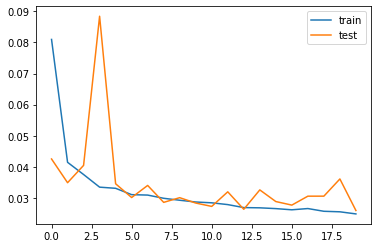

In [230]:
plt.figure(figsize=(6,4))
plt.plot(history_ANN_1.history['loss'], label='train')
plt.plot(history_ANN_1.history['val_loss'], label='test')
plt.legend()
plt.show()

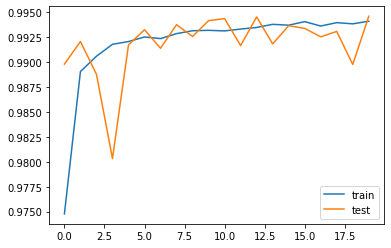

In [231]:
plt.figure(figsize=(6,4))
plt.plot(history_ANN_1.history['accuracy'], label='train')
plt.plot(history_ANN_1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [232]:
test_loss_1, test_acc_1 = model_ANN_1.evaluate(X_val,  y_val, verbose=2)

print('\nTest accuracy - trial 1:', test_acc_1*100)

ANN_pred_1 = model_ANN_1.predict(X_test_scaled)

923/923 - 2s - loss: 0.0260 - accuracy: 0.9946 - 2s/epoch - 2ms/step

Test accuracy - trial 1: 99.46150779724121
1407/1407 [==============================] - 3s 2ms/step


In [233]:
unique, counts = np.unique(ANN_pred_1, return_counts=True)

result_ANN_1 = np.column_stack((unique, counts)) 
print("result ANN 1",result_ANN_1)

result ANN 1 [[1.08701323e-25 1.00000000e+00]
 [7.75815443e-22 1.00000000e+00]
 [1.32763912e-21 1.00000000e+00]
 ...
 [9.99999881e-01 2.70000000e+01]
 [9.99999940e-01 2.50000000e+01]
 [1.00000000e+00 1.54000000e+02]]


In [235]:
ANN_1_test_pred = Test_set_df["ID"]
ANN_1_pred_df = pd.DataFrame(ANN_pred_1)
#reset index 
ANN_1_test_pred = ANN_1_test_pred.reset_index(drop=True)
ANN_1_pred_df   = ANN_1_pred_df.reset_index(drop=True)

result_data_ANN_1 = pd.concat([ANN_1_test_pred,ANN_1_pred_df],axis=1)

result_data_ANN_1.columns = ['ID', 'Default']

result_data_ANN_1.loc[:,'Default'] = result_data_ANN_1['Default'].apply(lambda x: "0" if x <= 0.5 else 1)

result_data_ANN_1.to_csv(wilson_path+'Ramesh_Gopinath_ANN_prediction_1.csv', index=False)

Model 7 - SVC

In [236]:
# Training the SVC model

from sklearn.svm import SVC   # Training the model with Support Vector Classifier
clf_svc_1 = SVC(kernel='linear') 

# fitting x samples and y classes 
clf_svc_1.fit(X_train, y_train) 
y_pred_svc1 = clf_svc_1.predict(X_val)

print("SVC 1 train score",clf_svc_1.score(X_train,y_train))
print("SVC 1 validation score",clf_svc_1.score(X_val,y_val))
print("")

print("SVC - Accuracy ",metrics.accuracy_score(y_val, y_pred_svc1))
print("SVC - Precision",metrics.precision_score(y_val, y_pred_svc1))
print("SVC - Recall   ",metrics.recall_score(y_val, y_pred_svc1))
print("SVC - F1 Score ",metrics.f1_score(y_val, y_pred_svc1))
print("SVC - ROC Score",metrics.roc_auc_score(y_val, y_pred_svc1))


SVC 1 train score 0.991126690204645
SVC 1 validation score 0.9904832864835574

SVC - Accuracy  0.9904832864835574
SVC - Precision 0.9949789659383905
SVC - Recall    0.9860802904982853
SVC - F1 Score  0.9905096423384782
SVC - ROC Score 0.9905155819303653


In [237]:
#Predicting the actual Test_data which has been given separately

y_pred_test_svc_1 = clf_svc_1.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_svc_1, return_counts=True)

result_SVC_1 = np.column_stack((unique, counts)) 
print("result SVC 1",result_SVC_1)

result SVC 1 [[    0     2]
 [    1 44998]]


In [238]:
SVC_1_test_pred = Test_set_df["ID"]
SVC_1_pred_df = pd.DataFrame(y_pred_test_svc_1)
#reset index 
SVC_1_test_pred = SVC_1_test_pred.reset_index(drop=True)
SVC_1_pred_df   = SVC_1_pred_df.reset_index(drop=True)

result_data_SVC_1 = pd.concat([SVC_1_test_pred,SVC_1_pred_df],axis=1)

result_data_SVC_1.columns = ['ID', 'Default']

result_data_SVC_1.to_csv(wilson_path+'Ramesh_Gopinath_SVC_prediction_1.csv', index=False)